<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [1]:
!wget --header="Host: doc-08-ag-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,hi;q=0.7" --header="Cookie: AUTH_f06adc60aq33eaualgd5po6hdm1s6teh_nonce=j8muisdp94ilg" --header="Connection: keep-alive" "https://doc-08-ag-docs.googleusercontent.com/docs/securesc/q51opf2frtb0ih091h60ikoc9keqcc8o/s3bnu8piv5jpn7uu0rj124jbl8c8rvta/1605015825000/00484516897554883881/17933184273207929048/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=j8muisdp94ilg&user=17933184273207929048&hash=lvvv2pq374nd5pgna8vf5c7caghpag6d" -c -O 'CurlWget574'

--2020-11-10 13:45:33--  https://doc-08-ag-docs.googleusercontent.com/docs/securesc/q51opf2frtb0ih091h60ikoc9keqcc8o/s3bnu8piv5jpn7uu0rj124jbl8c8rvta/1605015825000/00484516897554883881/17933184273207929048/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=j8muisdp94ilg&user=17933184273207929048&hash=lvvv2pq374nd5pgna8vf5c7caghpag6d
Resolving doc-08-ag-docs.googleusercontent.com (doc-08-ag-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-08-ag-docs.googleusercontent.com (doc-08-ag-docs.googleusercontent.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘CurlWget574’

CurlWget574             [  <=>               ]   8.85M  26.1MB/s    in 0.3s    

2020-11-10 13:45:34 (26.1 MB/s) - ‘CurlWget574’ saved [9282934]



In [2]:
!unzip CurlWget574

Archive:  CurlWget574
   creating: recordings/
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/0_jackson_25.wav  
  inflating: recordings/0_jackson_26.wav  
  inflating: recordings/0_jackson_27.wav  
  inflating: recordings/0_jackson_28.wav  
  inflatin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from sklearn.model_selection import train_test_split
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [2]:
#read the all file names in the recordings folder given by us
cur_path = os.path.join(os.getcwd(),'recordings')
all_files = []
for file in os.listdir(cur_path):
    all_files.append(file)
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"

<font size=4>Grader function 1 </font>

In [3]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [4]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
def create_df_audio_path(all_files, cur_path):
    df_audio =  pd.DataFrame(columns = ['path','label'])
    for file in all_files:
        audio_path = os.path.join(cur_path,file)
        class_label = file.split('_')[0]
        df_audio = df_audio.append({'path':audio_path,
                                    'label':class_label
                                    },ignore_index=True)
    return df_audio

df_audio = create_df_audio_path(all_files,cur_path)
df_audio.head()

,path,label
0,C:\Users\shubh\Downloads\spoken_digit\recordin...,0
1,C:\Users\shubh\Downloads\spoken_digit\recordin...,0
2,C:\Users\shubh\Downloads\spoken_digit\recordin...,0
3,C:\Users\shubh\Downloads\spoken_digit\recordin...,0
4,C:\Users\shubh\Downloads\spoken_digit\recordin...,0


In [5]:
#info
df_audio.to_csv('Audio_Path.csv',index=False)
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [6]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [7]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [8]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X = df_audio['path']
y = df_audio['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45, stratify=y)

<font size=4>Grader function 3 </font>

In [9]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [10]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [11]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
%time
X_train_processed = pd.DataFrame(index=X_train.index, columns=['raw_data','duration'])
samples = []
duration = []
for x in X_train.values:
    sample_duration = load_wav(x)
    samples.append(sample_duration[0])
    duration.append(sample_duration[1])

X_train_processed['raw_data'] = samples
X_train_processed['duration'] = duration
print(X_train_processed.head())
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
X_test_processed = pd.DataFrame(index=X_test.index, columns=['raw_data','duration'])
samples = []
duration = []
for x in X_test.values:
    sample_duration = load_wav(x)
    samples.append(sample_duration[0])
    duration.append(sample_duration[1])

X_test_processed['raw_data'] = samples
X_test_processed['duration'] = duration
X_test_processed.head()

Wall time: 0 ns
                                               raw_data  duration
1394  [0.00011648317, 0.00012629418, 0.00012472598, ...  0.276780
268   [0.015596645, 0.018357415, 0.017552573, 0.0150...  0.331519
1343  [0.00031743426, 0.0005046424, 0.00026486837, -...  0.292789
1013  [-0.009124456, -0.00996573, -0.009060617, -0.0...  0.344127
32    [-0.009718038, -0.011537649, -0.011723177, -0....  0.659637


,raw_data,duration
730,"[0.0003232073, -5.0014445e-05, -0.00021603802,...",0.314875
1119,"[0.0003463601, -0.00010481775, -0.00057679706,...",0.515420
529,"[-0.00021117534, -0.00016020918, -0.0001385266...",0.269161
1246,"[-0.0044021285, -0.00323067, -0.001539101, -0....",0.759274
1927,"[0.0006866851, 0.0009895106, 0.0011700175, 0.0...",0.495646


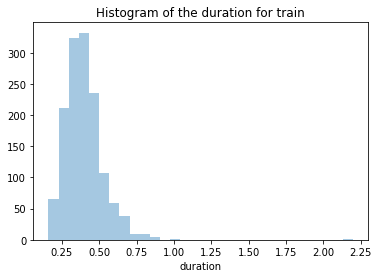

In [12]:
#plot the histogram of the duration for train
plt.title("Histogram of the duration for train")
sns.distplot(X_train_processed['duration'],kde=False,bins=30)

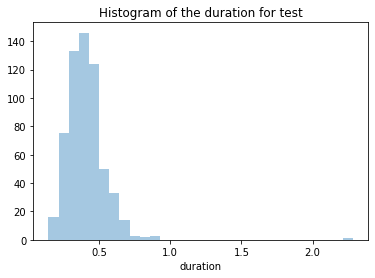

In [13]:
#plot the histogram of the duration for test
plt.title("Histogram of the duration for test")
sns.distplot(X_test_processed['duration'],kde=False,bins=30)

In [14]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(0,101,10):
    print('{} th percentile is {}'.format(i,np.percentile(X_train_processed['duration'],i)))

0 th percentile is 0.16104308390022676
10 th percentile is 0.25848072562358276
20 th percentile is 0.2974331065759637
30 th percentile is 0.3297777777777778
40 th percentile is 0.3569160997732426
50 th percentile is 0.38945578231292516
60 th percentile is 0.41328798185941046
70 th percentile is 0.4444671201814059
80 th percentile is 0.4826848072562358
90 th percentile is 0.5531655328798186
100 th percentile is 2.195918367346939


In [15]:
##print 90 to 100 percentile values with step size of 1. 
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for i in range(90,101,1):
    print('{} th percentile is {}'.format(i,np.percentile(X_train_processed['duration'],i)))

90 th percentile is 0.5531655328798186
91 th percentile is 0.5669832199546486
92 th percentile is 0.5790349206349206
93 th percentile is 0.599510657596372
94 th percentile is 0.611208163265306
95 th percentile is 0.6316009070294784
96 th percentile is 0.6431455782312925
97 th percentile is 0.6635741496598639
98 th percentile is 0.6957514739229022
99 th percentile is 0.79601179138322
100 th percentile is 2.195918367346939


<font size=4>Grader function 4 </font>

In [16]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [17]:
max_length  = 17640

In [18]:
def turncate_pad(l, n):
    if len(l) > n:
        return (l[:n], np.ones(n,dtype=bool))
    else:
        return np.hstack((l[:n],np.zeros(n-len(l)))), np.hstack((np.ones(len(l),dtype=bool),np.zeros(n-len(l),dtype=bool)))

In [19]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
X_train_pad_seq = []
X_train_mask    = []
for sample in X_train_processed['raw_data']:
    pad_seq, mask_seq = turncate_pad(sample,max_length)
    X_train_pad_seq.append(pad_seq)
    X_train_mask.append(mask_seq)
X_train_pad_seq = np.array(X_train_pad_seq)
X_train_mask = np.array(X_train_mask)

##X_train_pad_seq = pd.DataFrame(data = train_pad)
##X_train_mask = pd.DataFrame(data = train_mask)
## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.
X_test_pad_seq = []
X_test_mask    = []
for sample in X_test_processed['raw_data']:
    pad_seq, mask_seq = turncate_pad(sample,max_length)
    X_test_pad_seq.append(pad_seq)
    X_test_mask.append(mask_seq)
X_test_pad_seq = np.array(X_test_pad_seq)
X_test_mask = np.array(X_test_mask)

##X_test_pad_seq = pd.DataFrame(data = test_pad)
##X_test_mask = pd.DataFrame(data = test_mask)

<font size=4>Grader function 5 </font>

In [20]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

In [21]:
from tensorflow.keras.layers import Input, Embedding, Flatten, LSTM, Dense, concatenate, Dropout,BatchNormalization,SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import f1_score
from tensorflow.keras import regularizers
from tensorflow.python.keras.callbacks import TensorBoard,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [22]:
#converting class labels to two class lable categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
def metrics_f1(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return f1_score(y_true, y_pred,average='micro')
def calc_f1_score(y_true, y_pred):
    return tf.compat.v1.py_func(metrics_f1, (y_true, y_pred), tf.double)

### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

#### Model2 

In [24]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [25]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram = []
for pad_seq in X_train_pad_seq:
    X_train_spectrogram.append(convert_to_spectrogram(pad_seq))
X_train_spectrogram = np.array(X_train_spectrogram)

X_test_spectrogram = []
for pad_seq in X_test_pad_seq:
    X_test_spectrogram.append(convert_to_spectrogram(pad_seq))
X_test_spectrogram = np.array(X_test_spectrogram)

<font size=4>Grader function 6 </font>

In [26]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

In [36]:
## as discussed above, please write the LSTM
tf.keras.backend.clear_session()
input_layer = Input(shape=(64,35),name="input_layer")
x = LSTM(125,return_sequences=True)(input_layer)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = BatchNormalization()(x)
x = Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(10, activation = 'softmax')(x)
model1 = Model(inputs=input_layer,outputs=output)
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001,decay = 1e-4),metrics=[calc_f1_score])
print(model1.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 125)           80500     
_________________________________________________________________
global_average_pooling1d (Gl (None, 125)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 125)               500       
_________________________________________________________________
dense (Dense)                (None, 256)               32256     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896 

In [37]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime
if os.path.exists("logs_model2"):
    os.rmdir("logs")
logdir = os.path.join("logs_model2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs_model2\20201112-231052


In [38]:
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
filepath="weights_copy_model2.best.hdf5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_calc_f1_score', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_callback,tensorboard_callback]

In [39]:
model1.fit(X_train_spectrogram, y_train,epochs=1000,verbose=1,batch_size=256,
            validation_data=(X_test_spectrogram,y_test),callbacks =callbacks_list)

Epoch 1/1000
4/6 [===================>..........] - ETA: 0s - loss: 4.1627 - calc_f1_score: 0.0957
Epoch 00001: val_calc_f1_score improved from -inf to 0.06723, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 1s 133ms/step - loss: 4.1582 - calc_f1_score: 0.1015 - val_loss: 3.3043 - val_calc_f1_score: 0.0672
Epoch 2/1000
5/6 [========================>.....] - ETA: 0s - loss: 4.2264 - calc_f1_score: 0.0984
Epoch 00002: val_calc_f1_score improved from 0.06723 to 0.08523, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 75ms/step - loss: 4.2148 - calc_f1_score: 0.0987 - val_loss: 3.2747 - val_calc_f1_score: 0.0852
Epoch 3/1000
5/6 [========================>.....] - ETA: 0s - loss: 4.1711 - calc_f1_score: 0.1047
Epoch 00003: val_calc_f1_score improved from 0.08523 to 0.09813, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 1s 88ms/step - loss: 4.1608 - calc_f1_score: 0.1039 - val

6/6 [==============================] - ETA: 0s - loss: 3.4511 - calc_f1_score: 0.1903
Epoch 00025: val_calc_f1_score did not improve from 0.21686
6/6 [==============================] - 0s 37ms/step - loss: 3.4511 - calc_f1_score: 0.1903 - val_loss: 3.0440 - val_calc_f1_score: 0.2143
Epoch 26/1000
4/6 [===================>..........] - ETA: 0s - loss: 3.4760 - calc_f1_score: 0.1738
Epoch 00026: val_calc_f1_score improved from 0.21686 to 0.21816, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 58ms/step - loss: 3.4563 - calc_f1_score: 0.1730 - val_loss: 3.0356 - val_calc_f1_score: 0.2182
Epoch 27/1000
4/6 [===================>..........] - ETA: 0s - loss: 3.4070 - calc_f1_score: 0.1875
Epoch 00027: val_calc_f1_score did not improve from 0.21816
6/6 [==============================] - 0s 41ms/step - loss: 3.4030 - calc_f1_score: 0.1875 - val_loss: 3.0250 - val_calc_f1_score: 0.2157
Epoch 28/1000
5/6 [========================>.....] - ETA: 0s - loss: 

5/6 [========================>.....] - ETA: 0s - loss: 3.0539 - calc_f1_score: 0.2609
Epoch 00049: val_calc_f1_score improved from 0.34979 to 0.34991, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 59ms/step - loss: 3.0738 - calc_f1_score: 0.2549 - val_loss: 2.7666 - val_calc_f1_score: 0.3499
Epoch 50/1000
6/6 [==============================] - ETA: 0s - loss: 3.0629 - calc_f1_score: 0.2640
Epoch 00050: val_calc_f1_score did not improve from 0.34991
6/6 [==============================] - 0s 42ms/step - loss: 3.0629 - calc_f1_score: 0.2640 - val_loss: 2.7603 - val_calc_f1_score: 0.3473
Epoch 51/1000
5/6 [========================>.....] - ETA: 0s - loss: 3.1622 - calc_f1_score: 0.2422
Epoch 00051: val_calc_f1_score improved from 0.34991 to 0.36778, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 50ms/step - loss: 3.1546 - calc_f1_score: 0.2532 - val_loss: 2.7494 - val_calc_f1_score: 0.3678
Epoch 52/1000
5/6 

6/6 [==============================] - 0s 55ms/step - loss: 2.8430 - calc_f1_score: 0.3155 - val_loss: 2.4843 - val_calc_f1_score: 0.4571
Epoch 74/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.7963 - calc_f1_score: 0.3281
Epoch 00074: val_calc_f1_score did not improve from 0.45715
6/6 [==============================] - 0s 44ms/step - loss: 2.8013 - calc_f1_score: 0.3262 - val_loss: 2.4677 - val_calc_f1_score: 0.4570
Epoch 75/1000
4/6 [===================>..........] - ETA: 0s - loss: 2.7848 - calc_f1_score: 0.3574
Epoch 00075: val_calc_f1_score improved from 0.45715 to 0.46484, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 47ms/step - loss: 2.8303 - calc_f1_score: 0.3248 - val_loss: 2.4548 - val_calc_f1_score: 0.4648
Epoch 76/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.8080 - calc_f1_score: 0.3297
Epoch 00076: val_calc_f1_score improved from 0.46484 to 0.47124, saving model to weights_copy_model2.best.hdf5
6/6 

6/6 [==============================] - ETA: 0s - loss: 2.5868 - calc_f1_score: 0.4025
Epoch 00099: val_calc_f1_score improved from 0.56155 to 0.56404, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 53ms/step - loss: 2.5868 - calc_f1_score: 0.4025 - val_loss: 2.2493 - val_calc_f1_score: 0.5640
Epoch 100/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.5669 - calc_f1_score: 0.3719
Epoch 00100: val_calc_f1_score improved from 0.56404 to 0.56546, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 57ms/step - loss: 2.5677 - calc_f1_score: 0.3766 - val_loss: 2.2444 - val_calc_f1_score: 0.5655
Epoch 101/1000
6/6 [==============================] - ETA: 0s - loss: 2.5908 - calc_f1_score: 0.3786
Epoch 00101: val_calc_f1_score did not improve from 0.56546
6/6 [==============================] - 0s 50ms/step - loss: 2.5908 - calc_f1_score: 0.3786 - val_loss: 2.2400 - val_calc_f1_score: 0.5501
Epoch 102/1000
6

6/6 [==============================] - 0s 43ms/step - loss: 2.4043 - calc_f1_score: 0.4493 - val_loss: 2.1282 - val_calc_f1_score: 0.5524
Epoch 126/1000
4/6 [===================>..........] - ETA: 0s - loss: 2.4053 - calc_f1_score: 0.4209
Epoch 00126: val_calc_f1_score improved from 0.57730 to 0.59245, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 44ms/step - loss: 2.4284 - calc_f1_score: 0.4217 - val_loss: 2.0768 - val_calc_f1_score: 0.5924
Epoch 127/1000
4/6 [===================>..........] - ETA: 0s - loss: 2.4026 - calc_f1_score: 0.4463
Epoch 00127: val_calc_f1_score did not improve from 0.59245
6/6 [==============================] - 0s 34ms/step - loss: 2.4365 - calc_f1_score: 0.4398 - val_loss: 2.0604 - val_calc_f1_score: 0.5887
Epoch 128/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.4010 - calc_f1_score: 0.4430
Epoch 00128: val_calc_f1_score did not improve from 0.59245
6/6 [==============================] - 0s 36ms/step 

5/6 [========================>.....] - ETA: 0s - loss: 2.2163 - calc_f1_score: 0.4977
Epoch 00152: val_calc_f1_score improved from 0.61198 to 0.62867, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 56ms/step - loss: 2.2046 - calc_f1_score: 0.4994 - val_loss: 1.9237 - val_calc_f1_score: 0.6287
Epoch 153/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.2184 - calc_f1_score: 0.5016
Epoch 00153: val_calc_f1_score did not improve from 0.62867
6/6 [==============================] - 0s 44ms/step - loss: 2.2255 - calc_f1_score: 0.5013 - val_loss: 1.9174 - val_calc_f1_score: 0.6249
Epoch 154/1000
6/6 [==============================] - ETA: 0s - loss: 2.2174 - calc_f1_score: 0.5112
Epoch 00154: val_calc_f1_score did not improve from 0.62867
6/6 [==============================] - 0s 41ms/step - loss: 2.2174 - calc_f1_score: 0.5112 - val_loss: 1.9170 - val_calc_f1_score: 0.6160
Epoch 155/1000
4/6 [===================>..........] - ETA: 0s - los

Epoch 179/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.1105 - calc_f1_score: 0.5477
Epoch 00179: val_calc_f1_score improved from 0.65447 to 0.66323, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 68ms/step - loss: 2.1099 - calc_f1_score: 0.5536 - val_loss: 1.7948 - val_calc_f1_score: 0.6632
Epoch 180/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.0688 - calc_f1_score: 0.5516
Epoch 00180: val_calc_f1_score improved from 0.66323 to 0.66951, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 56ms/step - loss: 2.0720 - calc_f1_score: 0.5499 - val_loss: 1.7954 - val_calc_f1_score: 0.6695
Epoch 181/1000
5/6 [========================>.....] - ETA: 0s - loss: 2.0766 - calc_f1_score: 0.5453
Epoch 00181: val_calc_f1_score improved from 0.66951 to 0.67614, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 58ms/step - loss: 2.0768 - calc_f1_score: 0.54

Epoch 206/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.9723 - calc_f1_score: 0.5527
Epoch 00206: val_calc_f1_score did not improve from 0.68632
6/6 [==============================] - 0s 34ms/step - loss: 1.9701 - calc_f1_score: 0.5656 - val_loss: 1.7075 - val_calc_f1_score: 0.6637
Epoch 207/1000
6/6 [==============================] - ETA: 0s - loss: 1.9804 - calc_f1_score: 0.5753
Epoch 00207: val_calc_f1_score did not improve from 0.68632
6/6 [==============================] - 0s 48ms/step - loss: 1.9804 - calc_f1_score: 0.5753 - val_loss: 1.6999 - val_calc_f1_score: 0.6624
Epoch 208/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.9274 - calc_f1_score: 0.5813
Epoch 00208: val_calc_f1_score did not improve from 0.68632
6/6 [==============================] - 0s 38ms/step - loss: 1.9346 - calc_f1_score: 0.5747 - val_loss: 1.6871 - val_calc_f1_score: 0.6842
Epoch 209/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.9502 - calc_f1_score: 0.5859
Ep

Epoch 233/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.8039 - calc_f1_score: 0.6172
Epoch 00233: val_calc_f1_score did not improve from 0.70466
6/6 [==============================] - 0s 34ms/step - loss: 1.8140 - calc_f1_score: 0.6184 - val_loss: 1.6292 - val_calc_f1_score: 0.6971
Epoch 234/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.8652 - calc_f1_score: 0.6270
Epoch 00234: val_calc_f1_score did not improve from 0.70466
6/6 [==============================] - 0s 38ms/step - loss: 1.8444 - calc_f1_score: 0.6423 - val_loss: 1.6170 - val_calc_f1_score: 0.6971
Epoch 235/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.7838 - calc_f1_score: 0.6273
Epoch 00235: val_calc_f1_score did not improve from 0.70466
6/6 [==============================] - 0s 48ms/step - loss: 1.7925 - calc_f1_score: 0.6256 - val_loss: 1.6118 - val_calc_f1_score: 0.7021
Epoch 236/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.8720 - calc_f1_score: 0.6109
Ep

Epoch 260/1000
6/6 [==============================] - ETA: 0s - loss: 1.7670 - calc_f1_score: 0.6254
Epoch 00260: val_calc_f1_score did not improve from 0.71603
6/6 [==============================] - 0s 41ms/step - loss: 1.7670 - calc_f1_score: 0.6254 - val_loss: 1.5407 - val_calc_f1_score: 0.7062
Epoch 261/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.7025 - calc_f1_score: 0.6680
Epoch 00261: val_calc_f1_score improved from 0.71603 to 0.72917, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 58ms/step - loss: 1.7213 - calc_f1_score: 0.6455 - val_loss: 1.5336 - val_calc_f1_score: 0.7292
Epoch 262/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.7382 - calc_f1_score: 0.6391
Epoch 00262: val_calc_f1_score did not improve from 0.72917
6/6 [==============================] - 0s 36ms/step - loss: 1.7345 - calc_f1_score: 0.6451 - val_loss: 1.5324 - val_calc_f1_score: 0.7201
Epoch 263/1000
5/6 [========================>.....] 

Epoch 287/1000
6/6 [==============================] - ETA: 0s - loss: 1.6762 - calc_f1_score: 0.6669
Epoch 00287: val_calc_f1_score did not improve from 0.73816
6/6 [==============================] - 0s 43ms/step - loss: 1.6762 - calc_f1_score: 0.6669 - val_loss: 1.5058 - val_calc_f1_score: 0.7250
Epoch 288/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.6645 - calc_f1_score: 0.6828
Epoch 00288: val_calc_f1_score did not improve from 0.73816
6/6 [==============================] - 0s 45ms/step - loss: 1.6451 - calc_f1_score: 0.6926 - val_loss: 1.4928 - val_calc_f1_score: 0.7290
Epoch 289/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.6020 - calc_f1_score: 0.6789
Epoch 00289: val_calc_f1_score improved from 0.73816 to 0.74065, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 57ms/step - loss: 1.6112 - calc_f1_score: 0.6741 - val_loss: 1.4913 - val_calc_f1_score: 0.7406
Epoch 290/1000
5/6 [========================>.....] 

6/6 [==============================] - 0s 36ms/step - loss: 1.5188 - calc_f1_score: 0.7219 - val_loss: 1.4322 - val_calc_f1_score: 0.7520
Epoch 314/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.5675 - calc_f1_score: 0.7275
Epoch 00314: val_calc_f1_score did not improve from 0.75852
6/6 [==============================] - 0s 35ms/step - loss: 1.5643 - calc_f1_score: 0.7221 - val_loss: 1.4230 - val_calc_f1_score: 0.7522
Epoch 315/1000
6/6 [==============================] - ETA: 0s - loss: 1.5277 - calc_f1_score: 0.7193
Epoch 00315: val_calc_f1_score did not improve from 0.75852
6/6 [==============================] - 0s 44ms/step - loss: 1.5277 - calc_f1_score: 0.7193 - val_loss: 1.4195 - val_calc_f1_score: 0.7575
Epoch 316/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.5692 - calc_f1_score: 0.6943
Epoch 00316: val_calc_f1_score did not improve from 0.75852
6/6 [==============================] - 0s 33ms/step - loss: 1.5418 - calc_f1_score: 0.7118 - val_loss: 

Epoch 341/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.4485 - calc_f1_score: 0.7414
Epoch 00341: val_calc_f1_score did not improve from 0.76776
6/6 [==============================] - 0s 45ms/step - loss: 1.4515 - calc_f1_score: 0.7387 - val_loss: 1.3825 - val_calc_f1_score: 0.7638
Epoch 342/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.4947 - calc_f1_score: 0.7391
Epoch 00342: val_calc_f1_score did not improve from 0.76776
6/6 [==============================] - 0s 53ms/step - loss: 1.4903 - calc_f1_score: 0.7409 - val_loss: 1.3750 - val_calc_f1_score: 0.7601
Epoch 343/1000
6/6 [==============================] - ETA: 0s - loss: 1.4804 - calc_f1_score: 0.7429
Epoch 00343: val_calc_f1_score did not improve from 0.76776
6/6 [==============================] - 0s 42ms/step - loss: 1.4804 - calc_f1_score: 0.7429 - val_loss: 1.3664 - val_calc_f1_score: 0.7678
Epoch 344/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.4568 - calc_f1_score: 0.7398
Ep

Epoch 368/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.4047 - calc_f1_score: 0.7398
Epoch 00368: val_calc_f1_score did not improve from 0.78303
6/6 [==============================] - 0s 43ms/step - loss: 1.4078 - calc_f1_score: 0.7401 - val_loss: 1.3222 - val_calc_f1_score: 0.7740
Epoch 369/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.4300 - calc_f1_score: 0.7406
Epoch 00369: val_calc_f1_score did not improve from 0.78303
6/6 [==============================] - 0s 48ms/step - loss: 1.4226 - calc_f1_score: 0.7422 - val_loss: 1.3196 - val_calc_f1_score: 0.7741
Epoch 370/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.3630 - calc_f1_score: 0.7734
Epoch 00370: val_calc_f1_score did not improve from 0.78303
6/6 [==============================] - 0s 52ms/step - loss: 1.3681 - calc_f1_score: 0.7626 - val_loss: 1.3218 - val_calc_f1_score: 0.7576
Epoch 371/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.3609 - calc_f1_score: 0.7586
Ep

Epoch 395/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.3423 - calc_f1_score: 0.7766
Epoch 00395: val_calc_f1_score did not improve from 0.79451
6/6 [==============================] - 0s 43ms/step - loss: 1.3398 - calc_f1_score: 0.7791 - val_loss: 1.2831 - val_calc_f1_score: 0.7768
Epoch 396/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.3454 - calc_f1_score: 0.7680
Epoch 00396: val_calc_f1_score did not improve from 0.79451
6/6 [==============================] - 0s 43ms/step - loss: 1.3392 - calc_f1_score: 0.7733 - val_loss: 1.2787 - val_calc_f1_score: 0.7795
Epoch 397/1000
6/6 [==============================] - ETA: 0s - loss: 1.3284 - calc_f1_score: 0.7832
Epoch 00397: val_calc_f1_score did not improve from 0.79451
6/6 [==============================] - 0s 42ms/step - loss: 1.3284 - calc_f1_score: 0.7832 - val_loss: 1.2815 - val_calc_f1_score: 0.7770
Epoch 398/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.3455 - calc_f1_score: 0.7688
Ep

Epoch 423/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.2750 - calc_f1_score: 0.7820
Epoch 00423: val_calc_f1_score did not improve from 0.79451
6/6 [==============================] - 0s 63ms/step - loss: 1.2874 - calc_f1_score: 0.7781 - val_loss: 1.2335 - val_calc_f1_score: 0.7910
Epoch 424/1000
6/6 [==============================] - ETA: 0s - loss: 1.2850 - calc_f1_score: 0.7914
Epoch 00424: val_calc_f1_score improved from 0.79451 to 0.79605, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 56ms/step - loss: 1.2850 - calc_f1_score: 0.7914 - val_loss: 1.2333 - val_calc_f1_score: 0.7960
Epoch 425/1000
6/6 [==============================] - ETA: 0s - loss: 1.2619 - calc_f1_score: 0.7937
Epoch 00425: val_calc_f1_score did not improve from 0.79605
6/6 [==============================] - 0s 38ms/step - loss: 1.2619 - calc_f1_score: 0.7937 - val_loss: 1.2404 - val_calc_f1_score: 0.7934
Epoch 426/1000
4/6 [===================>..........] 

Epoch 450/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.2446 - calc_f1_score: 0.7992
Epoch 00450: val_calc_f1_score did not improve from 0.79877
6/6 [==============================] - 0s 40ms/step - loss: 1.2454 - calc_f1_score: 0.7980 - val_loss: 1.2072 - val_calc_f1_score: 0.7886
Epoch 451/1000
6/6 [==============================] - ETA: 0s - loss: 1.2345 - calc_f1_score: 0.7960
Epoch 00451: val_calc_f1_score did not improve from 0.79877
6/6 [==============================] - 0s 43ms/step - loss: 1.2345 - calc_f1_score: 0.7960 - val_loss: 1.2117 - val_calc_f1_score: 0.7949
Epoch 452/1000
6/6 [==============================] - ETA: 0s - loss: 1.2245 - calc_f1_score: 0.8040
Epoch 00452: val_calc_f1_score did not improve from 0.79877
6/6 [==============================] - 0s 39ms/step - loss: 1.2245 - calc_f1_score: 0.8040 - val_loss: 1.2079 - val_calc_f1_score: 0.7885
Epoch 453/1000
6/6 [==============================] - ETA: 0s - loss: 1.2180 - calc_f1_score: 0.8086
Ep

Epoch 477/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.1681 - calc_f1_score: 0.8211
Epoch 00477: val_calc_f1_score did not improve from 0.81889
6/6 [==============================] - 0s 46ms/step - loss: 1.1713 - calc_f1_score: 0.8190 - val_loss: 1.1759 - val_calc_f1_score: 0.7861
Epoch 478/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.1574 - calc_f1_score: 0.8193
Epoch 00478: val_calc_f1_score did not improve from 0.81889
6/6 [==============================] - 0s 39ms/step - loss: 1.1521 - calc_f1_score: 0.8281 - val_loss: 1.1747 - val_calc_f1_score: 0.7937
Epoch 479/1000
6/6 [==============================] - ETA: 0s - loss: 1.1670 - calc_f1_score: 0.8246
Epoch 00479: val_calc_f1_score did not improve from 0.81889
6/6 [==============================] - 0s 38ms/step - loss: 1.1670 - calc_f1_score: 0.8246 - val_loss: 1.1685 - val_calc_f1_score: 0.7963
Epoch 480/1000
6/6 [==============================] - ETA: 0s - loss: 1.1501 - calc_f1_score: 0.8293
Ep

6/6 [==============================] - ETA: 0s - loss: 1.1347 - calc_f1_score: 0.8263
Epoch 00504: val_calc_f1_score did not improve from 0.81913
6/6 [==============================] - 0s 42ms/step - loss: 1.1347 - calc_f1_score: 0.8263 - val_loss: 1.1665 - val_calc_f1_score: 0.8089
Epoch 505/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.0893 - calc_f1_score: 0.8344
Epoch 00505: val_calc_f1_score did not improve from 0.81913
6/6 [==============================] - 0s 41ms/step - loss: 1.0964 - calc_f1_score: 0.8300 - val_loss: 1.1737 - val_calc_f1_score: 0.8063
Epoch 506/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.1043 - calc_f1_score: 0.8406
Epoch 00506: val_calc_f1_score did not improve from 0.81913
6/6 [==============================] - 0s 46ms/step - loss: 1.1038 - calc_f1_score: 0.8408 - val_loss: 1.1750 - val_calc_f1_score: 0.8052
Epoch 507/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.1321 - calc_f1_score: 0.8305
Epoch 00507: val_

6/6 [==============================] - ETA: 0s - loss: 1.0673 - calc_f1_score: 0.8460
Epoch 00531: val_calc_f1_score did not improve from 0.82315
6/6 [==============================] - 0s 49ms/step - loss: 1.0673 - calc_f1_score: 0.8460 - val_loss: 1.1191 - val_calc_f1_score: 0.8169
Epoch 532/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.0781 - calc_f1_score: 0.8447
Epoch 00532: val_calc_f1_score improved from 0.82315 to 0.82446, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 49ms/step - loss: 1.0664 - calc_f1_score: 0.8520 - val_loss: 1.1108 - val_calc_f1_score: 0.8245
Epoch 533/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.0712 - calc_f1_score: 0.8531
Epoch 00533: val_calc_f1_score did not improve from 0.82446
6/6 [==============================] - 0s 44ms/step - loss: 1.0632 - calc_f1_score: 0.8582 - val_loss: 1.1071 - val_calc_f1_score: 0.8195
Epoch 534/1000
5/6 [========================>.....] - ETA: 0s - los

5/6 [========================>.....] - ETA: 0s - loss: 1.0485 - calc_f1_score: 0.8508
Epoch 00558: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 48ms/step - loss: 1.0442 - calc_f1_score: 0.8493 - val_loss: 1.1265 - val_calc_f1_score: 0.8080
Epoch 559/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.0348 - calc_f1_score: 0.8430
Epoch 00559: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 43ms/step - loss: 1.0402 - calc_f1_score: 0.8441 - val_loss: 1.1175 - val_calc_f1_score: 0.8079
Epoch 560/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.0529 - calc_f1_score: 0.8508
Epoch 00560: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 43ms/step - loss: 1.0491 - calc_f1_score: 0.8534 - val_loss: 1.1112 - val_calc_f1_score: 0.8168
Epoch 561/1000
4/6 [===================>..........] - ETA: 0s - loss: 1.0459 - calc_f1_score: 0.8516
Epoch 00561: val_

Epoch 00585: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 56ms/step - loss: 0.9884 - calc_f1_score: 0.8767 - val_loss: 1.0768 - val_calc_f1_score: 0.8307
Epoch 586/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.9996 - calc_f1_score: 0.8773
Epoch 00586: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 47ms/step - loss: 1.0047 - calc_f1_score: 0.8672 - val_loss: 1.0744 - val_calc_f1_score: 0.8295
Epoch 587/1000
6/6 [==============================] - ETA: 0s - loss: 1.0063 - calc_f1_score: 0.8474
Epoch 00587: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 43ms/step - loss: 1.0063 - calc_f1_score: 0.8474 - val_loss: 1.0801 - val_calc_f1_score: 0.8245
Epoch 588/1000
5/6 [========================>.....] - ETA: 0s - loss: 1.0171 - calc_f1_score: 0.8664
Epoch 00588: val_calc_f1_score did not improve from 0.83464
6/6 [==============================] - 0s 3

Epoch 613/1000
6/6 [==============================] - ETA: 0s - loss: 0.9791 - calc_f1_score: 0.8656
Epoch 00613: val_calc_f1_score did not improve from 0.83830
6/6 [==============================] - 0s 43ms/step - loss: 0.9791 - calc_f1_score: 0.8656 - val_loss: 1.0685 - val_calc_f1_score: 0.8194
Epoch 614/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.9151 - calc_f1_score: 0.8898
Epoch 00614: val_calc_f1_score did not improve from 0.83830
6/6 [==============================] - 0s 39ms/step - loss: 0.9267 - calc_f1_score: 0.8818 - val_loss: 1.0690 - val_calc_f1_score: 0.8155
Epoch 615/1000
6/6 [==============================] - ETA: 0s - loss: 0.9590 - calc_f1_score: 0.8707
Epoch 00615: val_calc_f1_score did not improve from 0.83830
6/6 [==============================] - 0s 40ms/step - loss: 0.9590 - calc_f1_score: 0.8707 - val_loss: 1.0727 - val_calc_f1_score: 0.8168
Epoch 616/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.9594 - calc_f1_score: 0.8781
Ep

5/6 [========================>.....] - ETA: 0s - loss: 0.9339 - calc_f1_score: 0.8758
Epoch 00640: val_calc_f1_score did not improve from 0.84233
6/6 [==============================] - 0s 44ms/step - loss: 0.9277 - calc_f1_score: 0.8798 - val_loss: 1.0621 - val_calc_f1_score: 0.8358
Epoch 641/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.9399 - calc_f1_score: 0.8891
Epoch 00641: val_calc_f1_score did not improve from 0.84233
6/6 [==============================] - 0s 40ms/step - loss: 0.9349 - calc_f1_score: 0.8951 - val_loss: 1.0430 - val_calc_f1_score: 0.8359
Epoch 642/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.9471 - calc_f1_score: 0.8838
Epoch 00642: val_calc_f1_score did not improve from 0.84233
6/6 [==============================] - 0s 39ms/step - loss: 0.9354 - calc_f1_score: 0.8840 - val_loss: 1.0347 - val_calc_f1_score: 0.8320
Epoch 643/1000
6/6 [==============================] - ETA: 0s - loss: 0.9422 - calc_f1_score: 0.8819
Epoch 00643: val_

6/6 [==============================] - ETA: 0s - loss: 0.8770 - calc_f1_score: 0.9026
Epoch 00667: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 42ms/step - loss: 0.8770 - calc_f1_score: 0.9026 - val_loss: 1.0632 - val_calc_f1_score: 0.8256
Epoch 668/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.8656 - calc_f1_score: 0.9150
Epoch 00668: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 38ms/step - loss: 0.8801 - calc_f1_score: 0.8992 - val_loss: 1.0441 - val_calc_f1_score: 0.8282
Epoch 669/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.9058 - calc_f1_score: 0.8955
Epoch 00669: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 37ms/step - loss: 0.9058 - calc_f1_score: 0.8925 - val_loss: 1.0421 - val_calc_f1_score: 0.8194
Epoch 670/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.8865 - calc_f1_score: 0.8916
Epoch 00670: val_

6/6 [==============================] - 0s 41ms/step - loss: 0.8792 - calc_f1_score: 0.8886 - val_loss: 1.0236 - val_calc_f1_score: 0.8400
Epoch 695/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.8659 - calc_f1_score: 0.9000
Epoch 00695: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 52ms/step - loss: 0.8693 - calc_f1_score: 0.8931 - val_loss: 1.0150 - val_calc_f1_score: 0.8259
Epoch 696/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.8772 - calc_f1_score: 0.8857
Epoch 00696: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 34ms/step - loss: 0.8818 - calc_f1_score: 0.8911 - val_loss: 1.0139 - val_calc_f1_score: 0.8310
Epoch 697/1000
6/6 [==============================] - ETA: 0s - loss: 0.8584 - calc_f1_score: 0.9054
Epoch 00697: val_calc_f1_score did not improve from 0.84979
6/6 [==============================] - 0s 45ms/step - loss: 0.8584 - calc_f1_score: 0.9054 - val_loss: 

Epoch 722/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.8377 - calc_f1_score: 0.9102
Epoch 00722: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 39ms/step - loss: 0.8314 - calc_f1_score: 0.9154 - val_loss: 1.0196 - val_calc_f1_score: 0.8362
Epoch 723/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.8292 - calc_f1_score: 0.9109
Epoch 00723: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 49ms/step - loss: 0.8260 - calc_f1_score: 0.9133 - val_loss: 1.0122 - val_calc_f1_score: 0.8298
Epoch 724/1000
6/6 [==============================] - ETA: 0s - loss: 0.8265 - calc_f1_score: 0.9155
Epoch 00724: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 38ms/step - loss: 0.8265 - calc_f1_score: 0.9155 - val_loss: 1.0112 - val_calc_f1_score: 0.8310
Epoch 725/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.8288 - calc_f1_score: 0.9055
Ep

6/6 [==============================] - 0s 53ms/step - loss: 0.8138 - calc_f1_score: 0.9011 - val_loss: 0.9837 - val_calc_f1_score: 0.8501
Epoch 750/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7892 - calc_f1_score: 0.9227
Epoch 00750: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 38ms/step - loss: 0.7820 - calc_f1_score: 0.9272 - val_loss: 1.0175 - val_calc_f1_score: 0.8308
Epoch 751/1000
6/6 [==============================] - ETA: 0s - loss: 0.8036 - calc_f1_score: 0.9187
Epoch 00751: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 42ms/step - loss: 0.8036 - calc_f1_score: 0.9187 - val_loss: 1.0282 - val_calc_f1_score: 0.8411
Epoch 752/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.8248 - calc_f1_score: 0.9047
Epoch 00752: val_calc_f1_score did not improve from 0.85109
6/6 [==============================] - 0s 46ms/step - loss: 0.8216 - calc_f1_score: 0.9053 - val_loss: 

Epoch 777/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7715 - calc_f1_score: 0.9234
Epoch 00777: val_calc_f1_score did not improve from 0.85263
6/6 [==============================] - 0s 37ms/step - loss: 0.7714 - calc_f1_score: 0.9195 - val_loss: 1.0031 - val_calc_f1_score: 0.8398
Epoch 778/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7693 - calc_f1_score: 0.9250
Epoch 00778: val_calc_f1_score did not improve from 0.85263
6/6 [==============================] - 0s 41ms/step - loss: 0.7704 - calc_f1_score: 0.9222 - val_loss: 1.0079 - val_calc_f1_score: 0.8310
Epoch 779/1000
6/6 [==============================] - ETA: 0s - loss: 0.7740 - calc_f1_score: 0.9256
Epoch 00779: val_calc_f1_score did not improve from 0.85263
6/6 [==============================] - 0s 44ms/step - loss: 0.7740 - calc_f1_score: 0.9256 - val_loss: 1.0001 - val_calc_f1_score: 0.8246
Epoch 780/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7804 - calc_f1_score: 0.9164
Ep

Epoch 804/1000
6/6 [==============================] - ETA: 0s - loss: 0.7786 - calc_f1_score: 0.9210
Epoch 00804: val_calc_f1_score did not improve from 0.85523
6/6 [==============================] - 0s 38ms/step - loss: 0.7786 - calc_f1_score: 0.9210 - val_loss: 1.0186 - val_calc_f1_score: 0.8297
Epoch 805/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7726 - calc_f1_score: 0.9203
Epoch 00805: val_calc_f1_score did not improve from 0.85523
6/6 [==============================] - 0s 43ms/step - loss: 0.7696 - calc_f1_score: 0.9253 - val_loss: 1.0082 - val_calc_f1_score: 0.8385
Epoch 806/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7534 - calc_f1_score: 0.9297
Epoch 00806: val_calc_f1_score did not improve from 0.85523
6/6 [==============================] - 0s 40ms/step - loss: 0.7537 - calc_f1_score: 0.9289 - val_loss: 0.9662 - val_calc_f1_score: 0.8385
Epoch 807/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7552 - calc_f1_score: 0.9258
Ep

5/6 [========================>.....] - ETA: 0s - loss: 0.7235 - calc_f1_score: 0.9344
Epoch 00831: val_calc_f1_score did not improve from 0.85914
6/6 [==============================] - 0s 40ms/step - loss: 0.7233 - calc_f1_score: 0.9328 - val_loss: 0.9426 - val_calc_f1_score: 0.8423
Epoch 832/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7239 - calc_f1_score: 0.9273
Epoch 00832: val_calc_f1_score did not improve from 0.85914
6/6 [==============================] - 0s 43ms/step - loss: 0.7290 - calc_f1_score: 0.9256 - val_loss: 0.9552 - val_calc_f1_score: 0.8499
Epoch 833/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7106 - calc_f1_score: 0.9367
Epoch 00833: val_calc_f1_score did not improve from 0.85914
6/6 [==============================] - 0s 47ms/step - loss: 0.7109 - calc_f1_score: 0.9348 - val_loss: 0.9632 - val_calc_f1_score: 0.8487
Epoch 834/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7525 - calc_f1_score: 0.9258
Epoch 00834: val_

Epoch 00858: val_calc_f1_score improved from 0.85914 to 0.86032, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 58ms/step - loss: 0.7048 - calc_f1_score: 0.9335 - val_loss: 0.9384 - val_calc_f1_score: 0.8603
Epoch 859/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.7405 - calc_f1_score: 0.9211
Epoch 00859: val_calc_f1_score did not improve from 0.86032
6/6 [==============================] - 0s 41ms/step - loss: 0.7369 - calc_f1_score: 0.9245 - val_loss: 0.9345 - val_calc_f1_score: 0.8525
Epoch 860/1000
6/6 [==============================] - ETA: 0s - loss: 0.7126 - calc_f1_score: 0.9342
Epoch 00860: val_calc_f1_score did not improve from 0.86032
6/6 [==============================] - 0s 39ms/step - loss: 0.7126 - calc_f1_score: 0.9342 - val_loss: 0.9292 - val_calc_f1_score: 0.8564
Epoch 861/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6993 - calc_f1_score: 0.9367
Epoch 00861: val_calc_f1_score did not improve from 

5/6 [========================>.....] - ETA: 0s - loss: 0.6920 - calc_f1_score: 0.9375
Epoch 00885: val_calc_f1_score did not improve from 0.86293
6/6 [==============================] - 0s 44ms/step - loss: 0.6932 - calc_f1_score: 0.9382 - val_loss: 0.9104 - val_calc_f1_score: 0.8555
Epoch 886/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6950 - calc_f1_score: 0.9344
Epoch 00886: val_calc_f1_score did not improve from 0.86293
6/6 [==============================] - 0s 45ms/step - loss: 0.7005 - calc_f1_score: 0.9384 - val_loss: 0.9247 - val_calc_f1_score: 0.8527
Epoch 887/1000
6/6 [==============================] - ETA: 0s - loss: 0.6852 - calc_f1_score: 0.9374
Epoch 00887: val_calc_f1_score did not improve from 0.86293
6/6 [==============================] - 0s 44ms/step - loss: 0.6852 - calc_f1_score: 0.9374 - val_loss: 0.9202 - val_calc_f1_score: 0.8464
Epoch 888/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6956 - calc_f1_score: 0.9336
Epoch 00888: val_

6/6 [==============================] - ETA: 0s - loss: 0.6759 - calc_f1_score: 0.9360
Epoch 00912: val_calc_f1_score did not improve from 0.86423
6/6 [==============================] - 0s 46ms/step - loss: 0.6759 - calc_f1_score: 0.9360 - val_loss: 1.0072 - val_calc_f1_score: 0.8308
Epoch 913/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.6624 - calc_f1_score: 0.9434
Epoch 00913: val_calc_f1_score did not improve from 0.86423
6/6 [==============================] - 0s 41ms/step - loss: 0.6607 - calc_f1_score: 0.9441 - val_loss: 0.9945 - val_calc_f1_score: 0.8372
Epoch 914/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.6522 - calc_f1_score: 0.9424
Epoch 00914: val_calc_f1_score did not improve from 0.86423
6/6 [==============================] - 0s 44ms/step - loss: 0.6598 - calc_f1_score: 0.9396 - val_loss: 0.9802 - val_calc_f1_score: 0.8374
Epoch 915/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6799 - calc_f1_score: 0.9375
Epoch 00915: val_

5/6 [========================>.....] - ETA: 0s - loss: 0.6524 - calc_f1_score: 0.9422
Epoch 00939: val_calc_f1_score did not improve from 0.86541
6/6 [==============================] - 0s 44ms/step - loss: 0.6491 - calc_f1_score: 0.9463 - val_loss: 0.9097 - val_calc_f1_score: 0.8503
Epoch 940/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6453 - calc_f1_score: 0.9484
Epoch 00940: val_calc_f1_score did not improve from 0.86541
6/6 [==============================] - 0s 48ms/step - loss: 0.6491 - calc_f1_score: 0.9445 - val_loss: 0.9117 - val_calc_f1_score: 0.8591
Epoch 941/1000
6/6 [==============================] - ETA: 0s - loss: 0.6725 - calc_f1_score: 0.9291
Epoch 00941: val_calc_f1_score did not improve from 0.86541
6/6 [==============================] - 0s 47ms/step - loss: 0.6725 - calc_f1_score: 0.9291 - val_loss: 0.8937 - val_calc_f1_score: 0.8641
Epoch 942/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6464 - calc_f1_score: 0.9484
Epoch 00942: val_

5/6 [========================>.....] - ETA: 0s - loss: 0.6162 - calc_f1_score: 0.9516
Epoch 00966: val_calc_f1_score improved from 0.86683 to 0.86778, saving model to weights_copy_model2.best.hdf5
6/6 [==============================] - 0s 59ms/step - loss: 0.6178 - calc_f1_score: 0.9541 - val_loss: 0.8873 - val_calc_f1_score: 0.8678
Epoch 967/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6246 - calc_f1_score: 0.9523
Epoch 00967: val_calc_f1_score did not improve from 0.86778
6/6 [==============================] - 0s 42ms/step - loss: 0.6350 - calc_f1_score: 0.9478 - val_loss: 0.9011 - val_calc_f1_score: 0.8588
Epoch 968/1000
6/6 [==============================] - ETA: 0s - loss: 0.6417 - calc_f1_score: 0.9370
Epoch 00968: val_calc_f1_score did not improve from 0.86778
6/6 [==============================] - 0s 44ms/step - loss: 0.6417 - calc_f1_score: 0.9370 - val_loss: 0.9064 - val_calc_f1_score: 0.8666
Epoch 969/1000
5/6 [========================>.....] - ETA: 0s - los

6/6 [==============================] - ETA: 0s - loss: 0.6055 - calc_f1_score: 0.9559
Epoch 00993: val_calc_f1_score did not improve from 0.86778
6/6 [==============================] - 0s 39ms/step - loss: 0.6055 - calc_f1_score: 0.9559 - val_loss: 0.8699 - val_calc_f1_score: 0.8619
Epoch 994/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6297 - calc_f1_score: 0.9516
Epoch 00994: val_calc_f1_score did not improve from 0.86778
6/6 [==============================] - 0s 36ms/step - loss: 0.6383 - calc_f1_score: 0.9471 - val_loss: 0.8605 - val_calc_f1_score: 0.8668
Epoch 995/1000
4/6 [===================>..........] - ETA: 0s - loss: 0.6072 - calc_f1_score: 0.9531
Epoch 00995: val_calc_f1_score did not improve from 0.86778
6/6 [==============================] - 0s 48ms/step - loss: 0.6105 - calc_f1_score: 0.9511 - val_loss: 0.8957 - val_calc_f1_score: 0.8653
Epoch 996/1000
5/6 [========================>.....] - ETA: 0s - loss: 0.6325 - calc_f1_score: 0.9477
Epoch 00996: val_

**Val_F1_Score for Model2 is 0.86778**
<br>
**Train_F1_Score for Model2 is 0.9553**

***Conclusion Of Model2***
<br>
f1 score and accuracy for model 2
<img src = "f1_loss_score_model2.png">
<br>
LSTM Layer Weight Distrubtion
<img src="LSTM_Model2.png">
<br>
Dense Layer Weight Distrubution
<img src="dense_0_model2.png">
<br>
Dense Layer 1 Weight Distrubution
<img src="dense_1_model2.png">
<br>
Dense Layer 2 Weight Distrubution
<img src="dense_2_model2.png">
<br>
Dense Layer 3 Weight Distrubution
<img src="dense_3_model2.png">
<br>
<br>
***LSTM Weights do not seems to be random. It's more arranged than model1. Dense Layer 2 and 3 has lots of variance in their weight dsitrubution from the initial stage. Even the last layer has better weight distrubution to classify them into 10 classes***

# 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

#### Model3

In [40]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data) 
    return augmented_data

In [41]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [42]:
aug_data = []
aug_label = []
for temp_path,label in zip(df_audio['path'],df_audio['label']):
  aug_temp = generate_augmented_data(temp_path)
  for temp in aug_temp:
    aug_data.append(temp)
    aug_label.append(label) 
aug_data_df = pd.DataFrame(columns=['raw_data','label'])
aug_data_df['raw_data'] = aug_data
aug_data_df['label'] = aug_label

In [43]:
aug_data_df.shape

(18000, 2)

As discussed above, for one data point, we will get 9 augmented data points.  
We have 2000 data points(train plus test) so, after augmentation we will get 18000 ( train - 12600, test - 5400). 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [44]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X = aug_data_df['raw_data']
y = aug_data_df['label']
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X, y, test_size=0.30, random_state=45, stratify=y)

In [45]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask
X_train_aug_pad_seq = []
X_train_aug_mask    = []
for sample in X_train_aug:
    pad_seq, mask_seq = turncate_pad(sample,max_length)
    X_train_aug_pad_seq.append(pad_seq)
    X_train_aug_mask.append(mask_seq)
X_train_aug_pad_seq = np.array(X_train_aug_pad_seq)
X_train_aug_mask = np.array(X_train_aug_mask)

##X_train_pad_seq = pd.DataFrame(data = train_pad)
##X_train_mask = pd.DataFrame(data = train_mask)
## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.
X_test_aug_pad_seq = []
X_test_aug_mask    = []
for sample in X_test_aug:
    pad_seq, mask_seq = turncate_pad(sample,max_length)
    X_test_aug_pad_seq.append(pad_seq)
    X_test_aug_mask.append(mask_seq)
X_test_aug_pad_seq = np.array(X_test_aug_pad_seq)
X_test_aug_mask = np.array(X_test_aug_mask)

##X_test_pad_seq = pd.DataFrame(data = test_pad)
##X_test_mask = pd.DataFrame(data = test_mask)

In [46]:
#converting class labels to 10 class lable categorical variables
y_train_aug = to_categorical(y_train_aug)
y_test_aug = to_categorical(y_test_aug)

In [ ]:
## as discussed above, please write the LSTM
input_layer = Input(shape=(max_length,1),name="input_layer")
input_mask = Input(shape=(max_length,),name="input_mask",dtype='bool')
x = LSTM(25)(input_layer,mask=input_mask)
x = Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
output = Dense(10, activation = 'softmax')(x)
model3 = Model(inputs=[input_layer,input_mask],outputs=output)
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001,decay = 1e-4),metrics=[calc_f1_score])
print(model3.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          6656        lstm[0][0]            

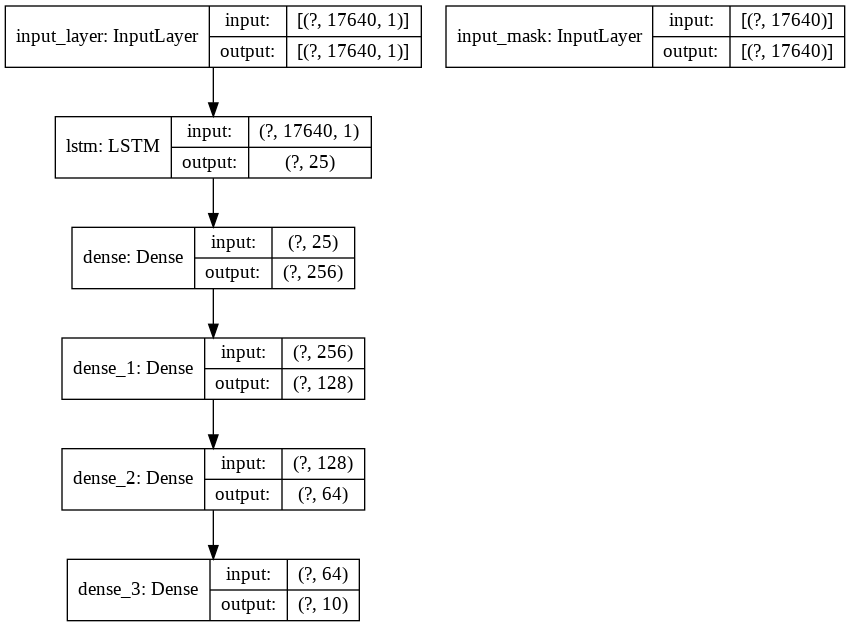

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model3, 'model3.png', show_shapes=True)

In [38]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime
logdir = os.path.join("logdir", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logdir\20201110-234755


In [39]:
tf.keras.backend.clear_session()

In [40]:
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
filepath="weights_copy_model3.best.hdf5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_calc_f1_score', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_callback,tensorboard_callback]

In [ ]:
train_data = [X_train_aug_pad_seq,X_train_aug_mask]
test_data  = [X_test_aug_pad_seq,X_test_aug_mask]

In [ ]:
model3.fit(train_data, y_train_aug,epochs=150,verbose=1,batch_size=256,
            validation_data=(test_data,y_test_aug),callbacks =callbacks_list)

Epoch 1/150
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
 1/50 [..............................] - ETA: 1s - loss: 3.1948 - calc_f1_score: 0.1094WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updat

***Validation F1 Score for Model3 0.10275***
<br>
***Train F1 Score for Model3 0.0998***

***Conclusion Of Model3***
<br>
f1 score and accuracy for model 2
<img src = "f1_loss_score_model3.png">
<br>
LSTM Layer Weight Distrubtion
<img src="LSTM_Model3.png">
<br>
Dense Layer Weight Distrubution
<img src="dense_0_model3.png">
<br>
Dense Layer 1 Weight Distrubution
<img src="dense_1_model3.png">
<br>
Dense Layer 2 Weight Distrubution
<img src="dense_2_model3.png">
<br>
Dense Layer 3 Weight Distrubution
<img src="dense_3_model3.png">

#### Model4

In [47]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_aug_spectrogram = []
for pad_seq in X_train_aug_pad_seq:
    X_train_aug_spectrogram.append(convert_to_spectrogram(pad_seq))
X_train_aug_spectrogram = np.array(X_train_aug_spectrogram)

X_test_aug_spectrogram = []
for pad_seq in X_test_aug_pad_seq:
    X_test_aug_spectrogram.append(convert_to_spectrogram(pad_seq))
X_test_aug_spectrogram = np.array(X_test_aug_spectrogram)

In [49]:
## as discussed above, please write the LSTM
input_layer = Input(shape=(64,35),name="input_layer")
x = LSTM(125,return_sequences=True)(input_layer)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(10, activation = 'softmax')(x)
model1 = Model(inputs=input_layer,outputs=output)
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001,decay = 1e-4),metrics=[calc_f1_score])
print(model1.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64, 125)           80500     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 125)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 125)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 125)               500       
_________________________________________________________________
dense_8 (Dense)              (None, 256)               32256     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0   

In [50]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime
logdir = os.path.join("logs_model4", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs_model4\20201112-233949


In [51]:
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
filepath="weights_copy_model4.best.hdf5"
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_calc_f1_score', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_callback,tensorboard_callback]

In [52]:
model1.fit(X_train_aug_spectrogram, y_train_aug,epochs=1000,verbose=1,batch_size=256,
            validation_data=(X_test_aug_spectrogram,y_test_aug),callbacks =callbacks_list)

Epoch 1/1000
49/50 [============================>.] - ETA: 0s - loss: 4.1012 - calc_f1_score: 0.1099- ETA: 2s - loss: 4.1417 - ca
Epoch 00001: val_calc_f1_score improved from -inf to 0.12393, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 3s 61ms/step - loss: 4.1013 - calc_f1_score: 0.1091 - val_loss: 3.1768 - val_calc_f1_score: 0.1239
Epoch 2/1000
50/50 [==============================] - ETA: 0s - loss: 3.9866 - calc_f1_score: 0.1129
Epoch 00002: val_calc_f1_score did not improve from 0.12393
50/50 [==============================] - 2s 39ms/step - loss: 3.9866 - calc_f1_score: 0.1129 - val_loss: 3.1967 - val_calc_f1_score: 0.1124
Epoch 3/1000
49/50 [============================>.] - ETA: 0s - loss: 3.8864 - calc_f1_score: 0.1145
Epoch 00003: val_calc_f1_score did not improve from 0.12393
50/50 [==============================] - 2s 35ms/step - loss: 3.8865 - calc_f1_score: 0.1143 - val_loss: 3.2208 - val_calc_f1_score: 0.1110
Epoch 4/1000
49/50 [

50/50 [==============================] - ETA: 0s - loss: 2.9522 - calc_f1_score: 0.2277
Epoch 00024: val_calc_f1_score improved from 0.36867 to 0.38400, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 43ms/step - loss: 2.9522 - calc_f1_score: 0.2277 - val_loss: 2.5843 - val_calc_f1_score: 0.3840
Epoch 25/1000
49/50 [============================>.] - ETA: 0s - loss: 2.9069 - calc_f1_score: 0.2307
Epoch 00025: val_calc_f1_score did not improve from 0.38400
50/50 [==============================] - 2s 42ms/step - loss: 2.9074 - calc_f1_score: 0.2311 - val_loss: 2.5874 - val_calc_f1_score: 0.3801
Epoch 26/1000
50/50 [==============================] - ETA: 0s - loss: 2.8880 - calc_f1_score: 0.2401
Epoch 00026: val_calc_f1_score improved from 0.38400 to 0.39376, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 46ms/step - loss: 2.8880 - calc_f1_score: 0.2401 - val_loss: 2.5550 - val_calc_f1_score: 0.3938
Epoch 

Epoch 49/1000
49/50 [============================>.] - ETA: 0s - loss: 2.5156 - calc_f1_score: 0.3257
Epoch 00049: val_calc_f1_score did not improve from 0.49793
50/50 [==============================] - 2s 45ms/step - loss: 2.5160 - calc_f1_score: 0.3256 - val_loss: 2.2014 - val_calc_f1_score: 0.4962
Epoch 50/1000
49/50 [============================>.] - ETA: 0s - loss: 2.4856 - calc_f1_score: 0.3375
Epoch 00050: val_calc_f1_score improved from 0.49793 to 0.52492, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 50ms/step - loss: 2.4843 - calc_f1_score: 0.3386 - val_loss: 2.1502 - val_calc_f1_score: 0.5249
Epoch 51/1000
49/50 [============================>.] - ETA: 0s - loss: 2.4540 - calc_f1_score: 0.3413
Epoch 00051: val_calc_f1_score did not improve from 0.52492
50/50 [==============================] - 2s 48ms/step - loss: 2.4537 - calc_f1_score: 0.3405 - val_loss: 2.1471 - val_calc_f1_score: 0.5196
Epoch 52/1000
49/50 [======================

50/50 [==============================] - 2s 47ms/step - loss: 2.1380 - calc_f1_score: 0.4291 - val_loss: 1.8042 - val_calc_f1_score: 0.5943
Epoch 75/1000
49/50 [============================>.] - ETA: 0s - loss: 2.1218 - calc_f1_score: 0.4369
Epoch 00075: val_calc_f1_score did not improve from 0.59428
50/50 [==============================] - 2s 40ms/step - loss: 2.1223 - calc_f1_score: 0.4350 - val_loss: 1.8264 - val_calc_f1_score: 0.5702
Epoch 76/1000
49/50 [============================>.] - ETA: 0s - loss: 2.1211 - calc_f1_score: 0.4411
Epoch 00076: val_calc_f1_score did not improve from 0.59428
50/50 [==============================] - 2s 44ms/step - loss: 2.1206 - calc_f1_score: 0.4419 - val_loss: 1.7932 - val_calc_f1_score: 0.5852
Epoch 77/1000
49/50 [============================>.] - ETA: 0s - loss: 2.0955 - calc_f1_score: 0.4444
Epoch 00077: val_calc_f1_score did not improve from 0.59428
50/50 [==============================] - 2s 42ms/step - loss: 2.0961 - calc_f1_score: 0.4440 -

48/50 [===========================>..] - ETA: 0s - loss: 1.8762 - calc_f1_score: 0.4987
Epoch 00100: val_calc_f1_score did not improve from 0.63329
50/50 [==============================] - 2s 47ms/step - loss: 1.8748 - calc_f1_score: 0.5006 - val_loss: 1.5529 - val_calc_f1_score: 0.6301
Epoch 101/1000
49/50 [============================>.] - ETA: 0s - loss: 1.8668 - calc_f1_score: 0.5049
Epoch 00101: val_calc_f1_score did not improve from 0.63329
50/50 [==============================] - 2s 47ms/step - loss: 1.8659 - calc_f1_score: 0.5055 - val_loss: 1.5565 - val_calc_f1_score: 0.6278
Epoch 102/1000
49/50 [============================>.] - ETA: 0s - loss: 1.8542 - calc_f1_score: 0.5047
Epoch 00102: val_calc_f1_score improved from 0.63329 to 0.64057, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 48ms/step - loss: 1.8548 - calc_f1_score: 0.5043 - val_loss: 1.5310 - val_calc_f1_score: 0.6406
Epoch 103/1000
49/50 [============================>.] -

Epoch 126/1000
50/50 [==============================] - ETA: 0s - loss: 1.6518 - calc_f1_score: 0.5546
Epoch 00126: val_calc_f1_score improved from 0.69531 to 0.69732, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 45ms/step - loss: 1.6518 - calc_f1_score: 0.5546 - val_loss: 1.3278 - val_calc_f1_score: 0.6973
Epoch 127/1000
49/50 [============================>.] - ETA: 0s - loss: 1.6452 - calc_f1_score: 0.5566
Epoch 00127: val_calc_f1_score did not improve from 0.69732
50/50 [==============================] - 2s 42ms/step - loss: 1.6454 - calc_f1_score: 0.5576 - val_loss: 1.3395 - val_calc_f1_score: 0.6915
Epoch 128/1000
49/50 [============================>.] - ETA: 0s - loss: 1.6421 - calc_f1_score: 0.5603
Epoch 00128: val_calc_f1_score did not improve from 0.69732
50/50 [==============================] - 2s 43ms/step - loss: 1.6428 - calc_f1_score: 0.5594 - val_loss: 1.3321 - val_calc_f1_score: 0.6893
Epoch 129/1000
48/50 [==================

Epoch 152/1000
48/50 [===========================>..] - ETA: 0s - loss: 1.4980 - calc_f1_score: 0.5906
Epoch 00152: val_calc_f1_score did not improve from 0.73757
50/50 [==============================] - 2s 40ms/step - loss: 1.4995 - calc_f1_score: 0.5901 - val_loss: 1.1924 - val_calc_f1_score: 0.7244
Epoch 153/1000
49/50 [============================>.] - ETA: 0s - loss: 1.4955 - calc_f1_score: 0.5958- ETA: 0s - loss: 1.4944 - calc_f1_sc
Epoch 00153: val_calc_f1_score did not improve from 0.73757
50/50 [==============================] - 2s 40ms/step - loss: 1.4954 - calc_f1_score: 0.5960 - val_loss: 1.2057 - val_calc_f1_score: 0.7103
Epoch 154/1000
48/50 [===========================>..] - ETA: 0s - loss: 1.5025 - calc_f1_score: 0.5907- ETA: 0s - loss: 1.4962 - calc_f1
Epoch 00154: val_calc_f1_score did not improve from 0.73757
50/50 [==============================] - 2s 43ms/step - loss: 1.5028 - calc_f1_score: 0.5913 - val_loss: 1.1726 - val_calc_f1_score: 0.7322
Epoch 155/1000
49/50

Epoch 178/1000
49/50 [============================>.] - ETA: 0s - loss: 1.3631 - calc_f1_score: 0.6279
Epoch 00178: val_calc_f1_score did not improve from 0.75941
50/50 [==============================] - 2s 45ms/step - loss: 1.3637 - calc_f1_score: 0.6257 - val_loss: 1.0779 - val_calc_f1_score: 0.7451
Epoch 179/1000
49/50 [============================>.] - ETA: 0s - loss: 1.3638 - calc_f1_score: 0.6299
Epoch 00179: val_calc_f1_score did not improve from 0.75941
50/50 [==============================] - 2s 45ms/step - loss: 1.3646 - calc_f1_score: 0.6291 - val_loss: 1.0739 - val_calc_f1_score: 0.7474
Epoch 180/1000
50/50 [==============================] - ETA: 0s - loss: 1.3613 - calc_f1_score: 0.6268- ETA: 0s - loss: 1.3648 - calc_f1_score
Epoch 00180: val_calc_f1_score did not improve from 0.75941
50/50 [==============================] - 2s 42ms/step - loss: 1.3613 - calc_f1_score: 0.6268 - val_loss: 1.0615 - val_calc_f1_score: 0.7469
Epoch 181/1000
50/50 [=============================

Epoch 204/1000
50/50 [==============================] - ETA: 0s - loss: 1.2713 - calc_f1_score: 0.6437
Epoch 00204: val_calc_f1_score did not improve from 0.78237
50/50 [==============================] - 2s 47ms/step - loss: 1.2713 - calc_f1_score: 0.6437 - val_loss: 0.9483 - val_calc_f1_score: 0.7769
Epoch 205/1000
49/50 [============================>.] - ETA: 0s - loss: 1.2560 - calc_f1_score: 0.6539
Epoch 00205: val_calc_f1_score did not improve from 0.78237
50/50 [==============================] - 2s 42ms/step - loss: 1.2560 - calc_f1_score: 0.6519 - val_loss: 0.9768 - val_calc_f1_score: 0.7694
Epoch 206/1000
49/50 [============================>.] - ETA: 0s - loss: 1.2610 - calc_f1_score: 0.6519
Epoch 00206: val_calc_f1_score improved from 0.78237 to 0.78344, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 45ms/step - loss: 1.2621 - calc_f1_score: 0.6510 - val_loss: 0.9479 - val_calc_f1_score: 0.7834
Epoch 207/1000
49/50 [==================

Epoch 230/1000
48/50 [===========================>..] - ETA: 0s - loss: 1.1662 - calc_f1_score: 0.6829
Epoch 00230: val_calc_f1_score did not improve from 0.79741
50/50 [==============================] - 2s 39ms/step - loss: 1.1659 - calc_f1_score: 0.6825 - val_loss: 0.8926 - val_calc_f1_score: 0.7907
Epoch 231/1000
48/50 [===========================>..] - ETA: 0s - loss: 1.1739 - calc_f1_score: 0.6792
Epoch 00231: val_calc_f1_score did not improve from 0.79741
50/50 [==============================] - 2s 39ms/step - loss: 1.1729 - calc_f1_score: 0.6797 - val_loss: 0.8761 - val_calc_f1_score: 0.7969
Epoch 232/1000
48/50 [===========================>..] - ETA: 0s - loss: 1.1643 - calc_f1_score: 0.6835
Epoch 00232: val_calc_f1_score did not improve from 0.79741
50/50 [==============================] - 2s 37ms/step - loss: 1.1652 - calc_f1_score: 0.6844 - val_loss: 0.8750 - val_calc_f1_score: 0.7964
Epoch 233/1000
49/50 [============================>.] - ETA: 0s - loss: 1.1610 - calc_f1_sc

Epoch 256/1000
50/50 [==============================] - ETA: 0s - loss: 1.0957 - calc_f1_score: 0.6962
Epoch 00256: val_calc_f1_score improved from 0.81007 to 0.81185, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 45ms/step - loss: 1.0957 - calc_f1_score: 0.6962 - val_loss: 0.8171 - val_calc_f1_score: 0.8118
Epoch 257/1000
49/50 [============================>.] - ETA: 0s - loss: 1.1030 - calc_f1_score: 0.6983
Epoch 00257: val_calc_f1_score did not improve from 0.81185
50/50 [==============================] - 2s 44ms/step - loss: 1.1027 - calc_f1_score: 0.6986 - val_loss: 0.8259 - val_calc_f1_score: 0.8050
Epoch 258/1000
50/50 [==============================] - ETA: 0s - loss: 1.0865 - calc_f1_score: 0.6976
Epoch 00258: val_calc_f1_score did not improve from 0.81185
50/50 [==============================] - 2s 42ms/step - loss: 1.0865 - calc_f1_score: 0.6976 - val_loss: 0.8083 - val_calc_f1_score: 0.8113
Epoch 259/1000
50/50 [==================

Epoch 283/1000
50/50 [==============================] - ETA: 0s - loss: 1.0339 - calc_f1_score: 0.7182
Epoch 00283: val_calc_f1_score did not improve from 0.82706
50/50 [==============================] - 2s 44ms/step - loss: 1.0339 - calc_f1_score: 0.7182 - val_loss: 0.7762 - val_calc_f1_score: 0.8117
Epoch 284/1000
49/50 [============================>.] - ETA: 0s - loss: 1.0323 - calc_f1_score: 0.7108
Epoch 00284: val_calc_f1_score improved from 0.82706 to 0.82830, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 49ms/step - loss: 1.0333 - calc_f1_score: 0.7083 - val_loss: 0.7522 - val_calc_f1_score: 0.8283
Epoch 285/1000
49/50 [============================>.] - ETA: 0s - loss: 1.0231 - calc_f1_score: 0.7177
Epoch 00285: val_calc_f1_score did not improve from 0.82830
50/50 [==============================] - 2s 47ms/step - loss: 1.0237 - calc_f1_score: 0.7173 - val_loss: 0.7549 - val_calc_f1_score: 0.8271
Epoch 286/1000
50/50 [==================

Epoch 309/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.9877 - calc_f1_score: 0.7247- ETA: 0s - loss: 0.9878 - calc_f1_score
Epoch 00309: val_calc_f1_score improved from 0.84020 to 0.84286, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 49ms/step - loss: 0.9878 - calc_f1_score: 0.7248 - val_loss: 0.7102 - val_calc_f1_score: 0.8429
Epoch 310/1000
49/50 [============================>.] - ETA: 0s - loss: 0.9665 - calc_f1_score: 0.7351- ETA: 1s - loss: 0.9461 -
Epoch 00310: val_calc_f1_score did not improve from 0.84286
50/50 [==============================] - 2s 48ms/step - loss: 0.9669 - calc_f1_score: 0.7340 - val_loss: 0.7208 - val_calc_f1_score: 0.8329
Epoch 311/1000
49/50 [============================>.] - ETA: 0s - loss: 0.9751 - calc_f1_score: 0.7319
Epoch 00311: val_calc_f1_score did not improve from 0.84286
50/50 [==============================] - 2s 45ms/step - loss: 0.9747 - calc_f1_score: 0.7312 - val_loss: 0.7123 - 

49/50 [============================>.] - ETA: 0s - loss: 0.9285 - calc_f1_score: 0.7427
Epoch 00334: val_calc_f1_score did not improve from 0.85440
50/50 [==============================] - 2s 43ms/step - loss: 0.9279 - calc_f1_score: 0.7439 - val_loss: 0.6845 - val_calc_f1_score: 0.8411
Epoch 335/1000
50/50 [==============================] - ETA: 0s - loss: 0.9323 - calc_f1_score: 0.7431
Epoch 00335: val_calc_f1_score did not improve from 0.85440
50/50 [==============================] - 3s 50ms/step - loss: 0.9323 - calc_f1_score: 0.7431 - val_loss: 0.6727 - val_calc_f1_score: 0.8450
Epoch 336/1000
50/50 [==============================] - ETA: 0s - loss: 0.9324 - calc_f1_score: 0.7417
Epoch 00336: val_calc_f1_score did not improve from 0.85440
50/50 [==============================] - 2s 42ms/step - loss: 0.9324 - calc_f1_score: 0.7417 - val_loss: 0.6703 - val_calc_f1_score: 0.8475
Epoch 337/1000
50/50 [==============================] - ETA: 0s - loss: 0.9310 - calc_f1_score: 0.7432
Epo

49/50 [============================>.] - ETA: 0s - loss: 0.8859 - calc_f1_score: 0.7545
Epoch 00360: val_calc_f1_score improved from 0.85707 to 0.86204, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 47ms/step - loss: 0.8865 - calc_f1_score: 0.7541 - val_loss: 0.6191 - val_calc_f1_score: 0.8620
Epoch 361/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.8830 - calc_f1_score: 0.7536
Epoch 00361: val_calc_f1_score did not improve from 0.86204
50/50 [==============================] - 2s 43ms/step - loss: 0.8822 - calc_f1_score: 0.7529 - val_loss: 0.6422 - val_calc_f1_score: 0.8516
Epoch 362/1000
49/50 [============================>.] - ETA: 0s - loss: 0.8866 - calc_f1_score: 0.7529
Epoch 00362: val_calc_f1_score did not improve from 0.86204
50/50 [==============================] - 2s 46ms/step - loss: 0.8864 - calc_f1_score: 0.7539 - val_loss: 0.6298 - val_calc_f1_score: 0.8585
Epoch 363/1000
49/50 [============================>.] -

Epoch 387/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.8506 - calc_f1_score: 0.7628
Epoch 00387: val_calc_f1_score improved from 0.86612 to 0.86825, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 3s 51ms/step - loss: 0.8500 - calc_f1_score: 0.7623 - val_loss: 0.5855 - val_calc_f1_score: 0.8683
Epoch 388/1000
49/50 [============================>.] - ETA: 0s - loss: 0.8440 - calc_f1_score: 0.7671
Epoch 00388: val_calc_f1_score did not improve from 0.86825
50/50 [==============================] - 2s 46ms/step - loss: 0.8456 - calc_f1_score: 0.7649 - val_loss: 0.6026 - val_calc_f1_score: 0.8615
Epoch 389/1000
49/50 [============================>.] - ETA: 0s - loss: 0.8352 - calc_f1_score: 0.7695
Epoch 00389: val_calc_f1_score did not improve from 0.86825
50/50 [==============================] - 2s 46ms/step - loss: 0.8356 - calc_f1_score: 0.7698 - val_loss: 0.5966 - val_calc_f1_score: 0.8619
Epoch 390/1000
50/50 [==================

Epoch 413/1000
50/50 [==============================] - ETA: 0s - loss: 0.8182 - calc_f1_score: 0.7764
Epoch 00413: val_calc_f1_score did not improve from 0.87269
50/50 [==============================] - 2s 46ms/step - loss: 0.8182 - calc_f1_score: 0.7764 - val_loss: 0.5653 - val_calc_f1_score: 0.8706
Epoch 414/1000
50/50 [==============================] - ETA: 0s - loss: 0.8195 - calc_f1_score: 0.7773
Epoch 00414: val_calc_f1_score improved from 0.87269 to 0.87482, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 3s 54ms/step - loss: 0.8195 - calc_f1_score: 0.7773 - val_loss: 0.5623 - val_calc_f1_score: 0.8748
Epoch 415/1000
50/50 [==============================] - ETA: 0s - loss: 0.8029 - calc_f1_score: 0.7791
Epoch 00415: val_calc_f1_score did not improve from 0.87482
50/50 [==============================] - 2s 40ms/step - loss: 0.8029 - calc_f1_score: 0.7791 - val_loss: 0.5681 - val_calc_f1_score: 0.8691
Epoch 416/1000
48/50 [==================

Epoch 439/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7695 - calc_f1_score: 0.7896
Epoch 00439: val_calc_f1_score did not improve from 0.87766
50/50 [==============================] - 2s 43ms/step - loss: 0.7692 - calc_f1_score: 0.7899 - val_loss: 0.5482 - val_calc_f1_score: 0.8757
Epoch 440/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7782 - calc_f1_score: 0.7868
Epoch 00440: val_calc_f1_score did not improve from 0.87766
50/50 [==============================] - 2s 42ms/step - loss: 0.7788 - calc_f1_score: 0.7857 - val_loss: 0.5402 - val_calc_f1_score: 0.8752
Epoch 441/1000
50/50 [==============================] - ETA: 0s - loss: 0.7897 - calc_f1_score: 0.7819
Epoch 00441: val_calc_f1_score improved from 0.87766 to 0.87908, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 47ms/step - loss: 0.7897 - calc_f1_score: 0.7819 - val_loss: 0.5340 - val_calc_f1_score: 0.8791
Epoch 442/1000
50/50 [==================

Epoch 465/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7507 - calc_f1_score: 0.7965
Epoch 00465: val_calc_f1_score did not improve from 0.88477
50/50 [==============================] - 2s 43ms/step - loss: 0.7504 - calc_f1_score: 0.7966 - val_loss: 0.5144 - val_calc_f1_score: 0.8835
Epoch 466/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7536 - calc_f1_score: 0.7917
Epoch 00466: val_calc_f1_score did not improve from 0.88477
50/50 [==============================] - 2s 44ms/step - loss: 0.7531 - calc_f1_score: 0.7930 - val_loss: 0.5202 - val_calc_f1_score: 0.8830
Epoch 467/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.7608 - calc_f1_score: 0.7909
Epoch 00467: val_calc_f1_score did not improve from 0.88477
50/50 [==============================] - 2s 42ms/step - loss: 0.7601 - calc_f1_score: 0.7900 - val_loss: 0.5162 - val_calc_f1_score: 0.8841
Epoch 468/1000
50/50 [==============================] - ETA: 0s - loss: 0.7563 - calc_f1_sc

49/50 [============================>.] - ETA: 0s - loss: 0.7199 - calc_f1_score: 0.8013
Epoch 00491: val_calc_f1_score improved from 0.88938 to 0.89045, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 47ms/step - loss: 0.7212 - calc_f1_score: 0.7996 - val_loss: 0.4891 - val_calc_f1_score: 0.8904
Epoch 492/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7211 - calc_f1_score: 0.7995
Epoch 00492: val_calc_f1_score did not improve from 0.89045
50/50 [==============================] - 2s 46ms/step - loss: 0.7216 - calc_f1_score: 0.7985 - val_loss: 0.5196 - val_calc_f1_score: 0.8816
Epoch 493/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7292 - calc_f1_score: 0.8002
Epoch 00493: val_calc_f1_score did not improve from 0.89045
50/50 [==============================] - 3s 51ms/step - loss: 0.7294 - calc_f1_score: 0.8003 - val_loss: 0.4931 - val_calc_f1_score: 0.8888
Epoch 494/1000
50/50 [==============================] -

50/50 [==============================] - ETA: 0s - loss: 0.7146 - calc_f1_score: 0.8060
Epoch 00517: val_calc_f1_score did not improve from 0.89382
50/50 [==============================] - 2s 45ms/step - loss: 0.7146 - calc_f1_score: 0.8060 - val_loss: 0.4823 - val_calc_f1_score: 0.8912
Epoch 518/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7135 - calc_f1_score: 0.8062
Epoch 00518: val_calc_f1_score did not improve from 0.89382
50/50 [==============================] - 2s 40ms/step - loss: 0.7132 - calc_f1_score: 0.8069 - val_loss: 0.4818 - val_calc_f1_score: 0.8912
Epoch 519/1000
49/50 [============================>.] - ETA: 0s - loss: 0.7072 - calc_f1_score: 0.8064
Epoch 00519: val_calc_f1_score did not improve from 0.89382
50/50 [==============================] - 2s 39ms/step - loss: 0.7070 - calc_f1_score: 0.8075 - val_loss: 0.4801 - val_calc_f1_score: 0.8920
Epoch 520/1000
50/50 [==============================] - ETA: 0s - loss: 0.6971 - calc_f1_score: 0.8076
Epo

49/50 [============================>.] - ETA: 0s - loss: 0.6849 - calc_f1_score: 0.8120
Epoch 00543: val_calc_f1_score did not improve from 0.89862
50/50 [==============================] - 2s 45ms/step - loss: 0.6862 - calc_f1_score: 0.8101 - val_loss: 0.4576 - val_calc_f1_score: 0.8984
Epoch 544/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6885 - calc_f1_score: 0.8115
Epoch 00544: val_calc_f1_score did not improve from 0.89862
50/50 [==============================] - 3s 51ms/step - loss: 0.6883 - calc_f1_score: 0.8114 - val_loss: 0.4589 - val_calc_f1_score: 0.8952
Epoch 545/1000
50/50 [==============================] - ETA: 0s - loss: 0.6799 - calc_f1_score: 0.8150
Epoch 00545: val_calc_f1_score did not improve from 0.89862
50/50 [==============================] - 2s 47ms/step - loss: 0.6799 - calc_f1_score: 0.8150 - val_loss: 0.4795 - val_calc_f1_score: 0.8897
Epoch 546/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6903 - calc_f1_score: 0.8072
Epo

50/50 [==============================] - 2s 48ms/step - loss: 0.6587 - calc_f1_score: 0.8160 - val_loss: 0.4589 - val_calc_f1_score: 0.8944
Epoch 570/1000
50/50 [==============================] - ETA: 0s - loss: 0.6582 - calc_f1_score: 0.8203
Epoch 00570: val_calc_f1_score did not improve from 0.90163
50/50 [==============================] - 2s 48ms/step - loss: 0.6582 - calc_f1_score: 0.8203 - val_loss: 0.4496 - val_calc_f1_score: 0.8965
Epoch 571/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6598 - calc_f1_score: 0.8213
Epoch 00571: val_calc_f1_score did not improve from 0.90163
50/50 [==============================] - 2s 47ms/step - loss: 0.6601 - calc_f1_score: 0.8206 - val_loss: 0.4467 - val_calc_f1_score: 0.8983
Epoch 572/1000
50/50 [==============================] - ETA: 0s - loss: 0.6630 - calc_f1_score: 0.8186
Epoch 00572: val_calc_f1_score did not improve from 0.90163
50/50 [==============================] - 2s 49ms/step - loss: 0.6630 - calc_f1_score: 0.818

49/50 [============================>.] - ETA: 0s - loss: 0.6441 - calc_f1_score: 0.8249- ETA: 0s - loss: 0.6389 - calc_f1_s
Epoch 00596: val_calc_f1_score did not improve from 0.90359
50/50 [==============================] - 2s 49ms/step - loss: 0.6449 - calc_f1_score: 0.8226 - val_loss: 0.4415 - val_calc_f1_score: 0.8968
Epoch 597/1000
50/50 [==============================] - ETA: 0s - loss: 0.6506 - calc_f1_score: 0.8247
Epoch 00597: val_calc_f1_score did not improve from 0.90359
50/50 [==============================] - 2s 45ms/step - loss: 0.6506 - calc_f1_score: 0.8247 - val_loss: 0.4335 - val_calc_f1_score: 0.9032
Epoch 598/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6385 - calc_f1_score: 0.8233
Epoch 00598: val_calc_f1_score did not improve from 0.90359
50/50 [==============================] - 2s 44ms/step - loss: 0.6386 - calc_f1_score: 0.8239 - val_loss: 0.4362 - val_calc_f1_score: 0.9009
Epoch 599/1000
50/50 [==============================] - ETA: 0s - loss

50/50 [==============================] - ETA: 0s - loss: 0.6201 - calc_f1_score: 0.8315
Epoch 00622: val_calc_f1_score did not improve from 0.90767
50/50 [==============================] - 2s 44ms/step - loss: 0.6201 - calc_f1_score: 0.8315 - val_loss: 0.4185 - val_calc_f1_score: 0.9062
Epoch 623/1000
50/50 [==============================] - ETA: 0s - loss: 0.6305 - calc_f1_score: 0.8269
Epoch 00623: val_calc_f1_score did not improve from 0.90767
50/50 [==============================] - 2s 44ms/step - loss: 0.6305 - calc_f1_score: 0.8269 - val_loss: 0.4279 - val_calc_f1_score: 0.9013
Epoch 624/1000
50/50 [==============================] - ETA: 0s - loss: 0.6235 - calc_f1_score: 0.8311
Epoch 00624: val_calc_f1_score did not improve from 0.90767
50/50 [==============================] - 2s 44ms/step - loss: 0.6235 - calc_f1_score: 0.8311 - val_loss: 0.4140 - val_calc_f1_score: 0.9075
Epoch 625/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6229 - calc_f1_score: 0.8323
Epo

50/50 [==============================] - ETA: 0s - loss: 0.6141 - calc_f1_score: 0.8334
Epoch 00648: val_calc_f1_score did not improve from 0.91122
50/50 [==============================] - 2s 44ms/step - loss: 0.6141 - calc_f1_score: 0.8334 - val_loss: 0.4076 - val_calc_f1_score: 0.9087
Epoch 649/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6044 - calc_f1_score: 0.8335
Epoch 00649: val_calc_f1_score did not improve from 0.91122
50/50 [==============================] - 2s 43ms/step - loss: 0.6035 - calc_f1_score: 0.8350 - val_loss: 0.4036 - val_calc_f1_score: 0.9098
Epoch 650/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6011 - calc_f1_score: 0.8308- ETA: 1s - loss: 0.6130 - 
Epoch 00650: val_calc_f1_score did not improve from 0.91122
50/50 [==============================] - 2s 44ms/step - loss: 0.6006 - calc_f1_score: 0.8321 - val_loss: 0.4043 - val_calc_f1_score: 0.9098
Epoch 651/1000
50/50 [==============================] - ETA: 0s - loss: 0.6045 

Epoch 675/1000
49/50 [============================>.] - ETA: 0s - loss: 0.6057 - calc_f1_score: 0.8327- ETA: 0s - loss: 0.6056 - calc_f1_score: 0.8
Epoch 00675: val_calc_f1_score did not improve from 0.91282
50/50 [==============================] - 2s 44ms/step - loss: 0.6053 - calc_f1_score: 0.8332 - val_loss: 0.3948 - val_calc_f1_score: 0.9109
Epoch 676/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5977 - calc_f1_score: 0.8367
Epoch 00676: val_calc_f1_score did not improve from 0.91282
50/50 [==============================] - 2s 40ms/step - loss: 0.5990 - calc_f1_score: 0.8361 - val_loss: 0.3974 - val_calc_f1_score: 0.9100
Epoch 677/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5853 - calc_f1_score: 0.8438
Epoch 00677: val_calc_f1_score improved from 0.91282 to 0.91371, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 42ms/step - loss: 0.5848 - calc_f1_score: 0.8444 - val_loss: 0.3952 - val_calc_f1_score: 0.

Epoch 701/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5779 - calc_f1_score: 0.8416
Epoch 00701: val_calc_f1_score did not improve from 0.91513
50/50 [==============================] - 2s 43ms/step - loss: 0.5774 - calc_f1_score: 0.8430 - val_loss: 0.3841 - val_calc_f1_score: 0.9135
Epoch 702/1000
50/50 [==============================] - ETA: 0s - loss: 0.5811 - calc_f1_score: 0.8406
Epoch 00702: val_calc_f1_score did not improve from 0.91513
50/50 [==============================] - 2s 43ms/step - loss: 0.5811 - calc_f1_score: 0.8406 - val_loss: 0.3908 - val_calc_f1_score: 0.9142
Epoch 703/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5621 - calc_f1_score: 0.8457
Epoch 00703: val_calc_f1_score improved from 0.91513 to 0.91531, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 45ms/step - loss: 0.5625 - calc_f1_score: 0.8460 - val_loss: 0.3881 - val_calc_f1_score: 0.9153
Epoch 704/1000
50/50 [==================

50/50 [==============================] - ETA: 0s - loss: 0.5625 - calc_f1_score: 0.8463
Epoch 00727: val_calc_f1_score did not improve from 0.91850
50/50 [==============================] - 2s 48ms/step - loss: 0.5625 - calc_f1_score: 0.8463 - val_loss: 0.3809 - val_calc_f1_score: 0.9167
Epoch 728/1000
50/50 [==============================] - ETA: 0s - loss: 0.5677 - calc_f1_score: 0.8484
Epoch 00728: val_calc_f1_score did not improve from 0.91850
50/50 [==============================] - 2s 44ms/step - loss: 0.5677 - calc_f1_score: 0.8484 - val_loss: 0.3764 - val_calc_f1_score: 0.9164
Epoch 729/1000
50/50 [==============================] - ETA: 0s - loss: 0.5597 - calc_f1_score: 0.8457
Epoch 00729: val_calc_f1_score did not improve from 0.91850
50/50 [==============================] - 2s 48ms/step - loss: 0.5597 - calc_f1_score: 0.8457 - val_loss: 0.3791 - val_calc_f1_score: 0.9151
Epoch 730/1000
50/50 [==============================] - ETA: 0s - loss: 0.5602 - calc_f1_score: 0.8468
Epo

50/50 [==============================] - ETA: 0s - loss: 0.5534 - calc_f1_score: 0.8502- ETA: 0s - loss: 0.5534 - calc_f1_score: 0.850
Epoch 00753: val_calc_f1_score did not improve from 0.92170
50/50 [==============================] - 2s 42ms/step - loss: 0.5534 - calc_f1_score: 0.8502 - val_loss: 0.3702 - val_calc_f1_score: 0.9174
Epoch 754/1000
50/50 [==============================] - ETA: 0s - loss: 0.5557 - calc_f1_score: 0.8465
Epoch 00754: val_calc_f1_score did not improve from 0.92170
50/50 [==============================] - 2s 49ms/step - loss: 0.5557 - calc_f1_score: 0.8465 - val_loss: 0.3678 - val_calc_f1_score: 0.9201
Epoch 755/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5567 - calc_f1_score: 0.8485
Epoch 00755: val_calc_f1_score did not improve from 0.92170
50/50 [==============================] - 2s 45ms/step - loss: 0.5565 - calc_f1_score: 0.8479 - val_loss: 0.3698 - val_calc_f1_score: 0.9181
Epoch 756/1000
50/50 [==============================] - ETA

Epoch 780/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5401 - calc_f1_score: 0.8528- ETA: 0s - loss: 0.5484 - calc_f1_sc
Epoch 00780: val_calc_f1_score did not improve from 0.92170
50/50 [==============================] - 3s 52ms/step - loss: 0.5411 - calc_f1_score: 0.8515 - val_loss: 0.3572 - val_calc_f1_score: 0.9215
Epoch 781/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5473 - calc_f1_score: 0.8520
Epoch 00781: val_calc_f1_score improved from 0.92170 to 0.92241, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 38ms/step - loss: 0.5477 - calc_f1_score: 0.8504 - val_loss: 0.3594 - val_calc_f1_score: 0.9224
Epoch 782/1000
50/50 [==============================] - ETA: 0s - loss: 0.5476 - calc_f1_score: 0.8480
Epoch 00782: val_calc_f1_score did not improve from 0.92241
50/50 [==============================] - 2s 35ms/step - loss: 0.5476 - calc_f1_score: 0.8480 - val_loss: 0.3582 - val_calc_f1_score: 0.9221
Epo

49/50 [============================>.] - ETA: 0s - loss: 0.5312 - calc_f1_score: 0.8548
Epoch 00806: val_calc_f1_score did not improve from 0.92259
50/50 [==============================] - 2s 37ms/step - loss: 0.5311 - calc_f1_score: 0.8549 - val_loss: 0.3561 - val_calc_f1_score: 0.9208
Epoch 807/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.5359 - calc_f1_score: 0.8529
Epoch 00807: val_calc_f1_score improved from 0.92259 to 0.92365, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 38ms/step - loss: 0.5370 - calc_f1_score: 0.8535 - val_loss: 0.3541 - val_calc_f1_score: 0.9237
Epoch 808/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5358 - calc_f1_score: 0.8512
Epoch 00808: val_calc_f1_score did not improve from 0.92365
50/50 [==============================] - 2s 37ms/step - loss: 0.5358 - calc_f1_score: 0.8506 - val_loss: 0.3529 - val_calc_f1_score: 0.9221
Epoch 809/1000
49/50 [============================>.] -

Epoch 833/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5202 - calc_f1_score: 0.8620
Epoch 00833: val_calc_f1_score did not improve from 0.92507
50/50 [==============================] - 2s 36ms/step - loss: 0.5210 - calc_f1_score: 0.8608 - val_loss: 0.3502 - val_calc_f1_score: 0.9228
Epoch 834/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5253 - calc_f1_score: 0.8582
Epoch 00834: val_calc_f1_score did not improve from 0.92507
50/50 [==============================] - 2s 39ms/step - loss: 0.5260 - calc_f1_score: 0.8560 - val_loss: 0.3420 - val_calc_f1_score: 0.9242
Epoch 835/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.5176 - calc_f1_score: 0.8581
Epoch 00835: val_calc_f1_score did not improve from 0.92507
50/50 [==============================] - 2s 37ms/step - loss: 0.5188 - calc_f1_score: 0.8584 - val_loss: 0.3486 - val_calc_f1_score: 0.9242
Epoch 836/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5085 - calc_f1_sc

Epoch 860/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.5146 - calc_f1_score: 0.8634
Epoch 00860: val_calc_f1_score did not improve from 0.92649
50/50 [==============================] - 2s 37ms/step - loss: 0.5161 - calc_f1_score: 0.8624 - val_loss: 0.3448 - val_calc_f1_score: 0.9240
Epoch 861/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5030 - calc_f1_score: 0.8615
Epoch 00861: val_calc_f1_score did not improve from 0.92649
50/50 [==============================] - 2s 38ms/step - loss: 0.5031 - calc_f1_score: 0.8629 - val_loss: 0.3433 - val_calc_f1_score: 0.9247
Epoch 862/1000
50/50 [==============================] - ETA: 0s - loss: 0.5142 - calc_f1_score: 0.8602
Epoch 00862: val_calc_f1_score did not improve from 0.92649
50/50 [==============================] - 2s 38ms/step - loss: 0.5142 - calc_f1_score: 0.8602 - val_loss: 0.3470 - val_calc_f1_score: 0.9217
Epoch 863/1000
49/50 [============================>.] - ETA: 0s - loss: 0.5133 - calc_f1_sc

49/50 [============================>.] - ETA: 0s - loss: 0.5116 - calc_f1_score: 0.8627
Epoch 00886: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 39ms/step - loss: 0.5106 - calc_f1_score: 0.8648 - val_loss: 0.3342 - val_calc_f1_score: 0.9265
Epoch 887/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4977 - calc_f1_score: 0.8652- ETA: 1s - loss: 0.4932 - calc_f1_score - ETA: 0s - loss: 0.4960 - calc_f1
Epoch 00887: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 37ms/step - loss: 0.4980 - calc_f1_score: 0.8643 - val_loss: 0.3353 - val_calc_f1_score: 0.9256
Epoch 888/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.4940 - calc_f1_score: 0.8656
Epoch 00888: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 38ms/step - loss: 0.4955 - calc_f1_score: 0.8650 - val_loss: 0.3307 - val_calc_f1_score: 0.9245
Epoch 889/1000
48/50 [=========

Epoch 913/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4926 - calc_f1_score: 0.8649
Epoch 00913: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 38ms/step - loss: 0.4938 - calc_f1_score: 0.8640 - val_loss: 0.3338 - val_calc_f1_score: 0.9254
Epoch 914/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4891 - calc_f1_score: 0.8631- ETA: 0s - loss: 0.4946 - calc_f1_scor
Epoch 00914: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 37ms/step - loss: 0.4898 - calc_f1_score: 0.8623 - val_loss: 0.3254 - val_calc_f1_score: 0.9270
Epoch 915/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.4779 - calc_f1_score: 0.8694
Epoch 00915: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 35ms/step - loss: 0.4799 - calc_f1_score: 0.8648 - val_loss: 0.3301 - val_calc_f1_score: 0.9261
Epoch 916/1000
49/50 [============================>.

Epoch 940/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4763 - calc_f1_score: 0.8717
Epoch 00940: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 36ms/step - loss: 0.4762 - calc_f1_score: 0.8722 - val_loss: 0.3208 - val_calc_f1_score: 0.9244
Epoch 941/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.4871 - calc_f1_score: 0.8693
Epoch 00941: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 37ms/step - loss: 0.4868 - calc_f1_score: 0.8696 - val_loss: 0.3230 - val_calc_f1_score: 0.9268
Epoch 942/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4758 - calc_f1_score: 0.8713
Epoch 00942: val_calc_f1_score did not improve from 0.92898
50/50 [==============================] - 2s 38ms/step - loss: 0.4763 - calc_f1_score: 0.8699 - val_loss: 0.3351 - val_calc_f1_score: 0.9245
Epoch 943/1000
50/50 [==============================] - ETA: 0s - loss: 0.4813 - calc_f1_sc

Epoch 967/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4774 - calc_f1_score: 0.8711- ETA: 1s - loss: 0.4757 - cal
Epoch 00967: val_calc_f1_score did not improve from 0.93022
50/50 [==============================] - 2s 39ms/step - loss: 0.4777 - calc_f1_score: 0.8705 - val_loss: 0.3193 - val_calc_f1_score: 0.9261
Epoch 968/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4832 - calc_f1_score: 0.8649
Epoch 00968: val_calc_f1_score improved from 0.93022 to 0.93040, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 39ms/step - loss: 0.4831 - calc_f1_score: 0.8651 - val_loss: 0.3139 - val_calc_f1_score: 0.9304
Epoch 969/1000
48/50 [===========================>..] - ETA: 0s - loss: 0.4641 - calc_f1_score: 0.8754
Epoch 00969: val_calc_f1_score did not improve from 0.93040
50/50 [==============================] - 2s 36ms/step - loss: 0.4636 - calc_f1_score: 0.8757 - val_loss: 0.3235 - val_calc_f1_score: 0.9270
Epoch 970/

49/50 [============================>.] - ETA: 0s - loss: 0.4695 - calc_f1_score: 0.8730- ETA: 0s - loss: 0.4742 - calc_f1_score
Epoch 00993: val_calc_f1_score improved from 0.93093 to 0.93111, saving model to weights_copy_model4.best.hdf5
50/50 [==============================] - 2s 38ms/step - loss: 0.4710 - calc_f1_score: 0.8705 - val_loss: 0.3143 - val_calc_f1_score: 0.9311
Epoch 994/1000
49/50 [============================>.] - ETA: 0s - loss: 0.4697 - calc_f1_score: 0.8732
Epoch 00994: val_calc_f1_score did not improve from 0.93111
50/50 [==============================] - 2s 35ms/step - loss: 0.4695 - calc_f1_score: 0.8732 - val_loss: 0.3144 - val_calc_f1_score: 0.9304
Epoch 995/1000
50/50 [==============================] - ETA: 0s - loss: 0.4753 - calc_f1_score: 0.8749
Epoch 00995: val_calc_f1_score did not improve from 0.93111
50/50 [==============================] - 2s 36ms/step - loss: 0.4753 - calc_f1_score: 0.8749 - val_loss: 0.3182 - val_calc_f1_score: 0.9263
Epoch 996/1000


***Validation F1 Score 0.93111***
<br>
***Train F1 Score 0.8749***

***Conclusion***

In [53]:
from prettytable import PrettyTable
model = ['Model-1','Model-2','Model-3','Model-4']

train_f1_score = [0.10795,0.86778,0.0998,0.93111]
validation_f1_score = [0.10795,0.95573,0.10275,0.8749]
x = PrettyTable()
x.field_names = ['Model','Train F1 Score','Validation F1 Score']
for i in range(4):
      x.add_row([model[i],train_f1_score[i],validation_f1_score[i]])
print(x)

+---------+----------------+---------------------+
|  Model  | Train F1 Score | Validation F1 Score |
+---------+----------------+---------------------+
| Model-1 |    0.10795     |       0.10795       |
| Model-2 |    0.86778     |       0.95573       |
| Model-3 |     0.0998     |       0.10275       |
| Model-4 |    0.93111     |        0.8749       |
+---------+----------------+---------------------+


***Conclusion Of Model4***
<br>
f1 score and accuracy for model 2
<img src = "f1_loss_score_model4.png">
<br>
LSTM Layer Weight Distrubtion
<img src="LSTM_Model4.png">
<br>
Dense Layer Weight Distrubution
<img src="dense_0_model4.png">
<br>
Dense Layer 1 Weight Distrubution
<img src="dense_1_model4.png">
<br>
Dense Layer 2 Weight Distrubution
<img src="dense_2_model4.png">
<br>
Dense Layer 3 Weight Distrubution
<img src="dense_3_model4.png">